In [ ]:
 from google.colab import drive

 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np


data_dir = '/content/drive/My Drive/2nd_test'
data_frames = []  # List to store individual DataFrames

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

# Concatenate the list of DataFrames into a single DataFrame
merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [ ]:
# transform index to datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.to_csv('merged_Dataset_BearingTest_2.csv')
merged_data.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


In [ ]:
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [ ]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

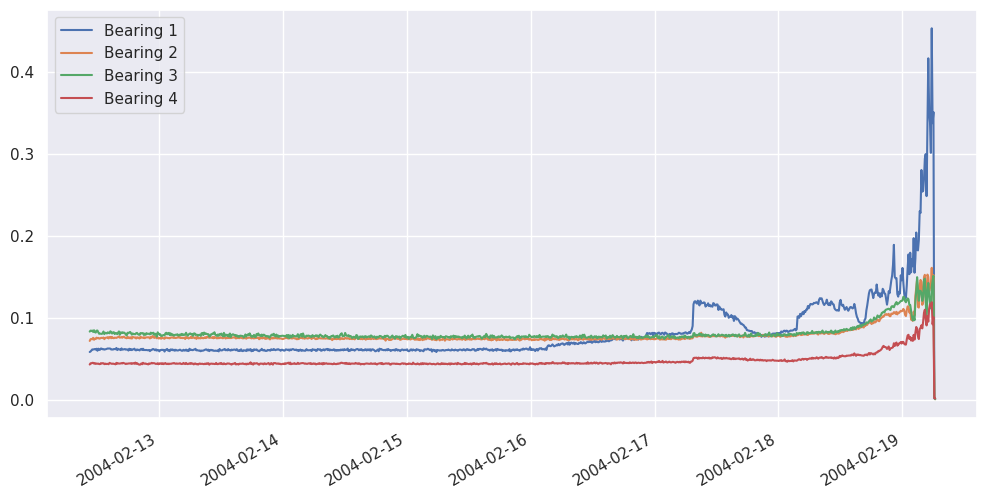

In [ ]:
merged_data.plot(figsize = (12, 6))

# EDA

In [ ]:
#Summary statistics of the merged_data
print(np.mean(merged_data, axis=0))
print(np.std(merged_data, axis=0))
print(np.min(merged_data, axis=0))
print(np.max(merged_data, axis=0))

Bearing 1    0.080905
Bearing 2    0.078532
Bearing 3    0.081356
Bearing 4    0.047822
dtype: float64
Bearing 1    0.040151
Bearing 2    0.011773
Bearing 3    0.011590
Bearing 4    0.009536
dtype: float64
Bearing 1    0.001168
Bearing 2    0.000767
Bearing 3    0.000716
Bearing 4    0.001699
dtype: float64
Bearing 1    0.453335
Bearing 2    0.161016
Bearing 3    0.151299
Bearing 4    0.119047
dtype: float64


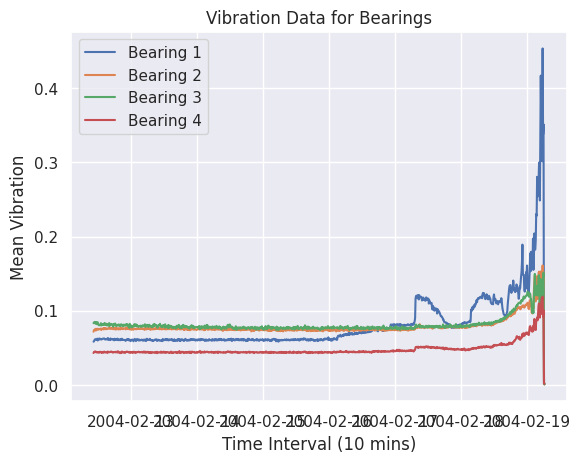

In [ ]:
#Plotting the data for vizualization purpose
import matplotlib.pyplot as plt

# Assuming your DataFrame has 4 columns, one for each bearing
for i in range(4):  # Loop through each column (bearing)
    plt.plot(merged_data.iloc[:, i], label=f'Bearing {i + 1}')

plt.xlabel('Time Interval (10 mins)')
plt.ylabel('Mean Vibration')
plt.title('Vibration Data for Bearings')
plt.legend()
plt.show()


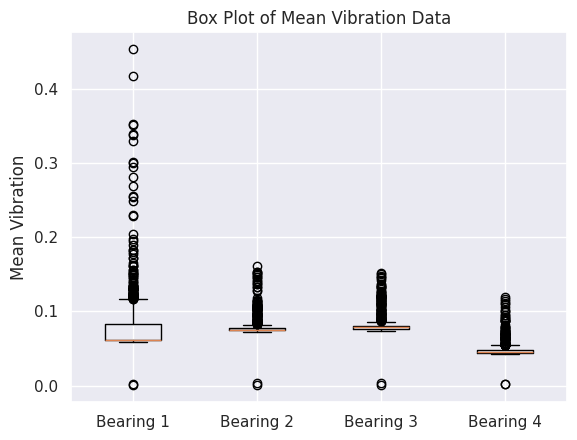

In [ ]:
#Box plot to understand the outliers- it is observed that Bearing 1 has the maximum number of outliers
plt.boxplot(merged_data)
plt.xticks([1, 2, 3, 4], ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4'])
plt.ylabel('Mean Vibration')
plt.title('Box Plot of Mean Vibration Data')
plt.show()


In [ ]:
#outlier identification using z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(merged_data))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {np.sum(outliers)}")


Number of outliers: 42


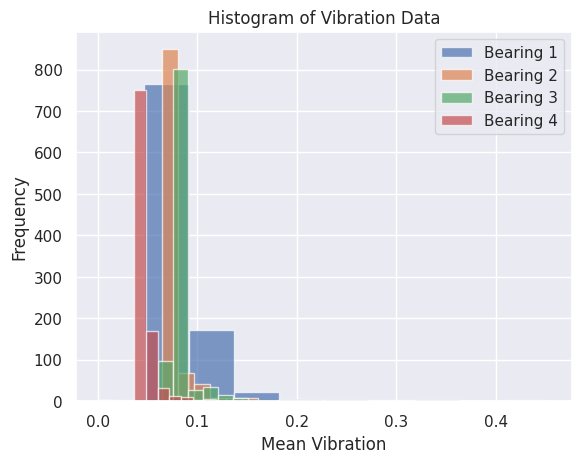

In [ ]:
for i in range(4):
    plt.hist(merged_data.iloc[:, i], alpha=0.7, label=f'Bearing {i + 1}')

plt.xlabel('Mean Vibration')
plt.ylabel('Frequency')
plt.title('Histogram of Vibration Data')
plt.legend()
plt.show()


In [ ]:
#printing the correlation values to understnd how the mean vibration values from each of bearings are corelated
print(merged_data.corr())

           Bearing 1  Bearing 2  Bearing 3  Bearing 4
Bearing 1   1.000000   0.887936   0.807630   0.945133
Bearing 2   0.887936   1.000000   0.965274   0.963396
Bearing 3   0.807630   0.965274   1.000000   0.907867
Bearing 4   0.945133   0.963396   0.907867   1.000000


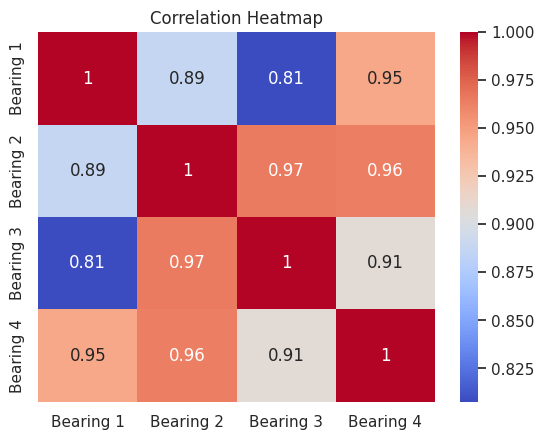

In [ ]:
import seaborn as sns

'''
Findings: The strong correlation between bearings 2, 3 & 4 suggests that the vibration pattern of these might be influenced
by similar conditions and we can validate this with other test sets.
'''

sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Feature Extraction

In [ ]:
#Statistical features for each bearings
'''
Findings: The high skew & kurtosis values of both bearings 1 & 4 indicates that there might be some anomalies in those
bearings a and we should pay close attention to those while analysing further
'''

def extract_statistical_features(df):
    features = pd.DataFrame()
    features['mean'] = merged_data.mean(axis=0)
    features['std'] = merged_data.std(axis=0)
    features['skew'] = merged_data.skew(axis=0)
    features['kurtosis'] = merged_data.kurtosis(axis=0)
    features['max'] = merged_data.max(axis=0)
    features['min'] = merged_data.min(axis=0)
    features['range'] = features['max'] - features['min']
    return features

stat_features = extract_statistical_features(merged_data)
print(stat_features)


               mean       std      skew   kurtosis       max       min  \
Bearing 1  0.080905  0.040171  4.187934  24.727763  0.453335  0.001168   
Bearing 2  0.078532  0.011779  3.106714  19.736684  0.161016  0.000767   
Bearing 3  0.081356  0.011596  2.484647  15.261315  0.151299  0.000716   
Bearing 4  0.047822  0.009541  3.729213  20.338313  0.119047  0.001699   

              range  
Bearing 1  0.452167  
Bearing 2  0.160249  
Bearing 3  0.150583  
Bearing 4  0.117349  


# Normalizing the data

In [ ]:
# Normalize the data before applying FFT
# Z-score normalization
merged_data_normalized = merged_data.apply(lambda x: (x - x.mean()) / x.std())
print(merged_data_normalized.head())
# Then perform FFT as you did earlier


                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
2004-02-12 10:32:39  -0.561901  -0.568799   0.162632  -0.498424
2004-02-12 10:42:39  -0.545413  -0.384232   0.265557  -0.343884
2004-02-12 10:52:39  -0.514515  -0.365478   0.221632  -0.354150
2004-02-12 11:02:39  -0.484170  -0.397954   0.267456  -0.287249
2004-02-12 11:12:39  -0.486527  -0.248142   0.127698  -0.283375


In [ ]:
#Frequency domain feature extraction
import numpy as np
import pandas as pd
from scipy.fft import fft

# Perform FFT and extract frequency domain features
def extract_frequency_features(df):
    n = merged_data_normalized.shape[0]  # Number of time steps
    fft_features = pd.DataFrame()

    for i in range(merged_data_normalized.shape[1]):  # Loop through each column (bearing)
        # Perform FFT on each bearing's data
        fft_result = fft(merged_data_normalized.iloc[:, i].values)  # Ensure we pass a 1D numpy array
        # Get the magnitude of the FFT coefficients (absolute value)
        magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
        peak_frequency = np.argmax(magnitude)  # Find the peak frequency
        fft_features[f'peak_frequency_bearing_{i+1}'] = [peak_frequency]

    return fft_features

# Assuming 'merged_data' is your DataFrame with vibration data
fft_features = extract_frequency_features(merged_data)
print(fft_features)


   peak_frequency_bearing_1  peak_frequency_bearing_2  \
0                         1                         1   

   peak_frequency_bearing_3  peak_frequency_bearing_4  
0                         1                         1  


# calculating the peak frequencies in each of the bearings without using any filters

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

# Define the sampling rate
sampling_rate = 20000  # 20 kHz

# Function to extract peak frequency from each bearing
def extract_peak_frequency(signal, fs):
    n = len(signal)
    # Convert the signal to a NumPy array
    signal = signal.to_numpy()  # Fix for AttributeError
    # Perform FFT
    fft_result = fft(signal)
    # Get the magnitude of the FFT coefficients
    magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
    # Find the index of the maximum magnitude (ignoring the DC component)
    peak_index = np.argmax(magnitude[1:]) + 1
    # Convert the index to the actual frequency
    peak_frequency = (peak_index * fs) / n
    return peak_frequency

# Extract peak frequencies for each bearing
peak_frequencies = {}

for i in range(4):  # Loop through each bearing
    signal = merged_data.iloc[:, i]
    peak_frequencies[f'Bearing_{i+1}'] = extract_peak_frequency(signal, sampling_rate)

# Display the peak frequencies
print("Peak Frequencies (in Hz) for Each Bearing:")
print(peak_frequencies)


Peak Frequencies (in Hz) for Each Bearing:
{'Bearing_1': 20.32520325203252, 'Bearing_2': 20.32520325203252, 'Bearing_3': 20.32520325203252, 'Bearing_4': 20.32520325203252}


# calculating the peak frequencies in each of the bearings using a band-pass filter

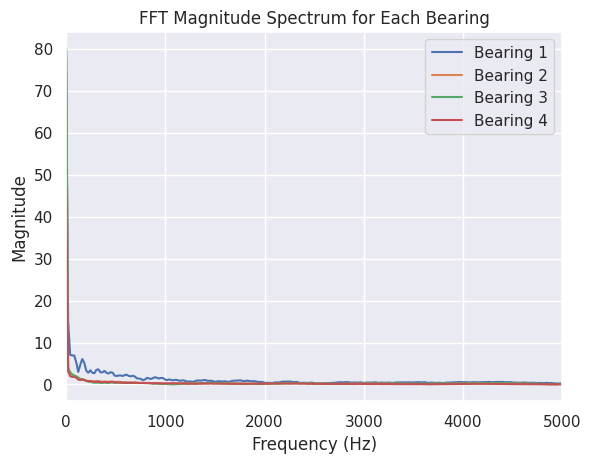

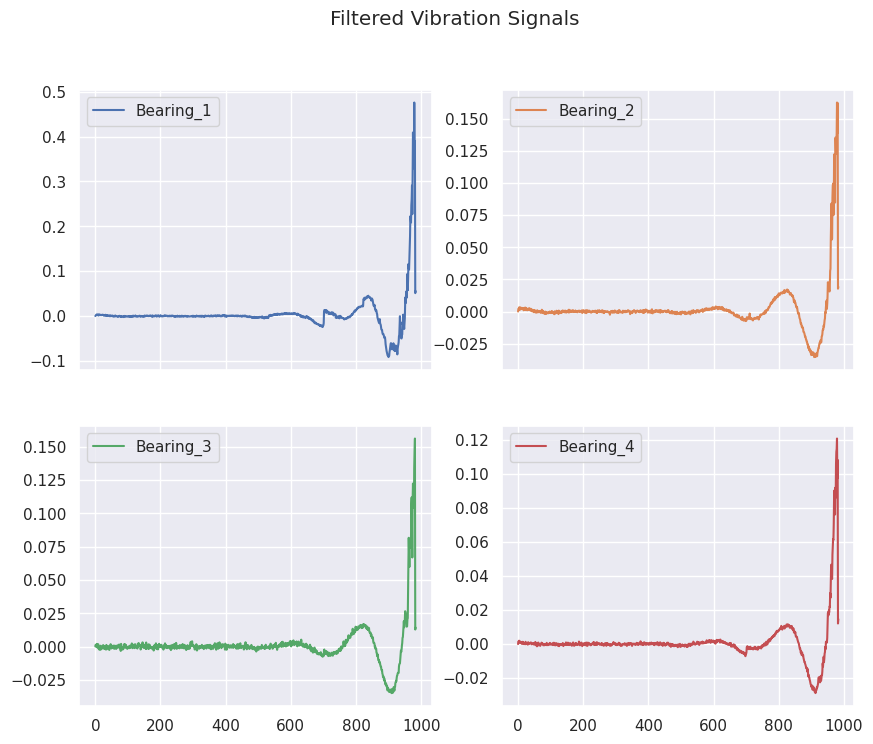

   peak_frequency_bearing_1  peak_frequency_bearing_2  \
0                       0.0                       0.0   

   peak_frequency_bearing_3  peak_frequency_bearing_4  
0                       0.0                       0.0  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

sampling_rate = 20000  # 20 kHz
n = merged_data.shape[0]
frequencies = np.linspace(0, sampling_rate / 2, n // 2)

# Plot FFT magnitude spectrum for each bearing to analyze any low-frequency dominance
for i in range(4):
    signal = merged_data.iloc[:, i].to_numpy()
    fft_result = fft(signal)
    magnitude = np.abs(fft_result[:n // 2])
    plt.plot(frequencies, magnitude, label=f'Bearing {i+1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude Spectrum for Each Bearing')
plt.legend()
plt.xlim(0, 5000)  # Limit to 5 kHz for a closer look
plt.show()


from scipy.signal import butter, filtfilt

# Define the band-pass filter with corrected cutoff values
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency (10,000 Hz for 20 kHz sampling rate)
    low = lowcut / nyquist
    high = highcut / nyquist
    if not (0 < low < 1) or not (0 < high < 1):
        raise ValueError(f"Cutoff frequencies must be between 0 and Nyquist frequency ({nyquist} Hz)."
                         f" Received: lowcut={lowcut}, highcut={highcut}")
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Define valid cutoff frequencies
lowcut = 100    # Lower cutoff (e.g., 100 Hz)
highcut = 9500  # Upper cutoff (slightly below Nyquist to avoid boundary issues)
sampling_rate = 20000  # 20 kHz

# Apply the filter
filtered_data = pd.DataFrame()
for i in range(4):
    bearing_data = merged_data.iloc[:, i]
    filtered_data[f'Bearing_{i+1}'] = bandpass_filter(bearing_data, lowcut, highcut, sampling_rate)

# Plot the filtered data
filtered_data.plot(subplots=True, layout=(2, 2), figsize=(10, 8), title='Filtered Vibration Signals')
plt.show()


from scipy.fft import fft

# Perform FFT and extract frequency domain features
def extract_frequency_features(df, sampling_rate):
    n = df.shape[0]  # Number of time steps (samples)
    fft_features = pd.DataFrame()

    for i in range(4):  # Loop through each bearing
        # Convert the column to a NumPy array
        signal = df.iloc[:, i].to_numpy()
        # Perform FFT on each bearing's data
        fft_result = fft(signal)
        # Get the magnitude of the FFT coefficients (absolute value)
        magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
        # Calculate the peak frequency index
        peak_frequency_idx = np.argmax(magnitude)
        # Convert peak frequency index to actual frequency in Hz
        peak_frequency = (peak_frequency_idx / n) * sampling_rate
        fft_features[f'peak_frequency_bearing_{i+1}'] = [peak_frequency]

    return fft_features

# Define sampling rate
sampling_rate = 20000  # 20 kHz

# Extract FFT features
fft_features = extract_frequency_features(merged_data, sampling_rate)
print(fft_features)



# calculating the variance in the original vibration data for each of the bearings

In [ ]:
print(merged_data.var())


Bearing 1    0.001614
Bearing 2    0.000139
Bearing 3    0.000134
Bearing 4    0.000091
dtype: float64


# Calculating the peak frequencies in each of the bearings using a High-Pass filter

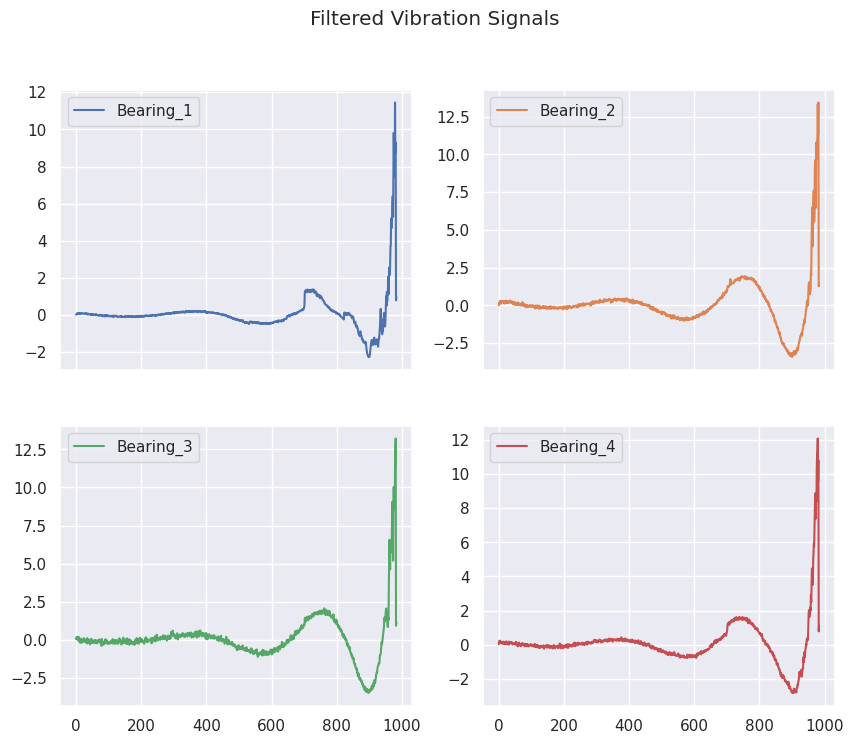

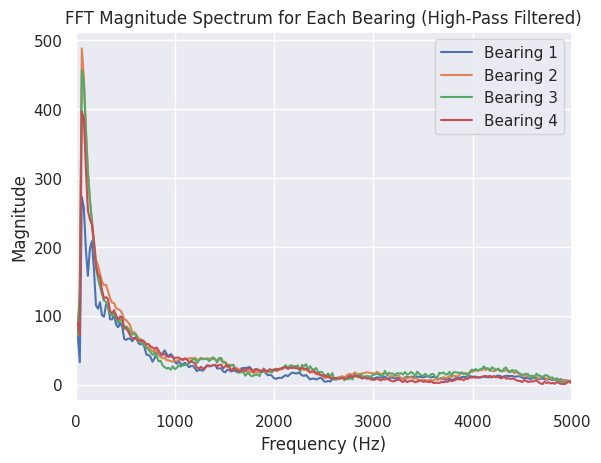

   peak_frequency_bearing_1  peak_frequency_bearing_2  \
0                  60.97561                  60.97561   

   peak_frequency_bearing_3  peak_frequency_bearing_4  
0                  60.97561                  60.97561  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, filtfilt

# Define the high-pass filter
def high_pass_filter(data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency (10,000 Hz for 20 kHz sampling rate)
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Define sampling rate and cutoff frequency for high-pass filter
sampling_rate = 20000  # 20 kHz
cutoff_freq = 50  # Set a suitable cutoff frequency (e.g., 50 Hz)

# Apply the high-pass filter to the normalized data (merged_data_normalized)
filtered_data = pd.DataFrame()

# Using the merged_data_normalized instead of merged_data
for i in range(4):
    bearing_data = merged_data_normalized.iloc[:, i]  # Accessing normalized data
    filtered_data[f'Bearing_{i+1}'] = high_pass_filter(bearing_data, cutoff_freq, sampling_rate)

# Plot the filtered data to inspect the results
filtered_data.plot(subplots=True, layout=(2, 2), figsize=(10, 8), title='Filtered Vibration Signals')
plt.show()

# Plot FFT magnitude spectrum for each bearing to analyze any low-frequency dominance
n = filtered_data.shape[0]
frequencies = np.linspace(0, sampling_rate / 2, n // 2)

for i in range(4):
    signal = filtered_data.iloc[:, i].to_numpy()
    fft_result = fft(signal)
    magnitude = np.abs(fft_result[:n // 2])
    plt.plot(frequencies, magnitude, label=f'Bearing {i+1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude Spectrum for Each Bearing (High-Pass Filtered)')
plt.legend()
plt.xlim(0, 5000)  # Limit to 5 kHz for a closer look
plt.show()

# Perform FFT and extract frequency domain features from the filtered data
def extract_frequency_features(df, sampling_rate):
    n = df.shape[0]  # Number of time steps (samples)
    fft_features = pd.DataFrame()

    for i in range(4):  # Loop through each bearing
        # Convert the column to a NumPy array
        signal = df.iloc[:, i].to_numpy()
        # Perform FFT on each bearing's data
        fft_result = fft(signal)
        # Get the magnitude of the FFT coefficients (absolute value)
        magnitude = np.abs(fft_result[:n // 2])  # Only positive frequencies
        # Calculate the peak frequency index
        peak_frequency_idx = np.argmax(magnitude)
        # Convert peak frequency index to actual frequency in Hz
        peak_frequency = (peak_frequency_idx / n) * sampling_rate
        fft_features[f'peak_frequency_bearing_{i+1}'] = [peak_frequency]

    return fft_features

# Extract FFT features from the high-pass filtered data
fft_features = extract_frequency_features(filtered_data, sampling_rate)
print(fft_features)


# wavelet

# Wavelet Transformation where decomposition level is 4 and hence the number of rows that we get as output is way lesser than that of the original number of samples

In [ ]:
!pip install PyWavelets
import pywt
import numpy as np
import pandas as pd

# Assume 'merged_data_normalized' is your DataFrame containing normalized vibration data

def extract_wavelet_features(df):
    wavelet_features = pd.DataFrame()

    for i in range(4):  # Loop through each bearing
        signal = merged_data_normalized.iloc[:, i].to_numpy()

        # Perform Discrete Wavelet Transform (DWT) - Decompose into 4 levels (can adjust level based on need)
        coeffs = pywt.wavedec(signal, 'db4', level=4)  # 'db4' is Daubechies wavelet with 4 taps

        # Extract features from wavelet coefficients (e.g., energy, mean)
        features = []
        for coeff in coeffs:
            energy = np.sum(coeff**2)  # Energy of the wavelet coefficients
            mean = np.mean(coeff)     # Mean of the wavelet coefficients
            features.extend([energy, mean])

        # Store features for each bearing
        wavelet_features[f'Bearing_{i+1}_wavelet'] = features

    return wavelet_features

# Extract wavelet features for the normalized data
wavelet_features = extract_wavelet_features(merged_data_normalized)

# Display the extracted features
print(wavelet_features)
wavelet_features

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.5 MB/s eta 0:00:00
   Bearing_1_wavelet  Bearing_2_wavelet  Bearing_3_wavelet  Bearing_4_wavelet
0         813.486202        1119.232059        1160.361526         958.371345
1          -0.170499          -0.463083          -0.288696          -0.354081
2         176.163273         152.165029         101.749157         217.874132
3          -0.019566          -0.010116          -0.004590          -0.018155
4          60.158826         112.735649          91.991425         123.849268
5           0.005007           0.012638           0.016265           0.005361
6          89.607144         152.541972         189.965418          67.700725
7          -0.001778          -0.013102          -0.002058          -0.005880
8          41.397525          96.052120          95.977653          55.121522
9          -0.002314           0.008439          -0.001000           0.003732


,Bearing_1_wavelet,Bearing_2_wavelet,Bearing_3_wavelet,Bearing_4_wavelet
0,813.486202,1119.232059,1160.361526,958.371345
1,-0.170499,-0.463083,-0.288696,-0.354081
2,176.163273,152.165029,101.749157,217.874132
3,-0.019566,-0.010116,-0.004590,-0.018155
4,60.158826,112.735649,91.991425,123.849268
5,0.005007,0.012638,0.016265,0.005361
6,89.607144,152.541972,189.965418,67.700725
7,-0.001778,-0.013102,-0.002058,-0.005880
8,41.397525,96.052120,95.977653,55.121522
9,-0.002314,0.008439,-0.001000,0.003732


# Wavelet Transformation where decomposition level is 1 and hence the number of rows have been halved as compared to the original rows

In [ ]:
import numpy as np
import pandas as pd
import pywt  # For wavelet transform

def wavelet_transform(data, wavelet='db4'):
    coeffs = []
    for i in range(data.shape[1]):  # Loop through each bearing
        signal = data.iloc[:, i].to_numpy()
        # Perform Discrete Wavelet Transform (DWT)
        coeff, _ = pywt.dwt(signal, wavelet)
        coeffs.append(coeff)  # Store the wavelet coefficients for each bearing

    # Ensure that the result is reshaped correctly to match the number of rows in data
    coeff_df = pd.DataFrame(np.array(coeffs).T, columns=[f'Bearing_{i+1}_wavelet' for i in range(data.shape[1])])
    return coeff_df

# Apply wavelet transform to the normalized data
wavelet_features = wavelet_transform(merged_data_normalized)

# Check the shape of the output
print(wavelet_features.shape)  # Should be (984, 4)

# Display first 20 rows to confirm the result
print(wavelet_features.head(10))  # Should display the first 20 rows, not just 10


(495, 4)
   Bearing_1_wavelet  Bearing_2_wavelet  Bearing_3_wavelet  Bearing_4_wavelet
0          -0.677205          -0.481266           0.281692          -0.425807
1          -0.731222          -0.492694           0.365259          -0.448326
2          -0.796177          -0.790565           0.240381          -0.688228
3          -0.764490          -0.599558           0.348119          -0.541316
4          -0.694703          -0.466147           0.301266          -0.413816
5          -0.677836          -0.547205           0.277077          -0.486987
6          -0.677225          -0.449108           0.205474          -0.551553
7          -0.689774          -0.368005           0.308878          -0.537835
8          -0.700586          -0.450833          -0.040124          -0.625806
9          -0.654936          -0.384237          -0.141164          -0.524287


# Post performing Wavelet transformation, using that data to extract features like energy, entropy, skewness, mean and others

In [ ]:
'''
Findings: Considering Bearing_4 as an example: The energy values suggest there is a significant variation across the wavelet
scales. However, the entropy values being low suggests periodicity in the signal.
'''


import numpy as np
import pywt
from scipy.stats import skew, kurtosis, entropy
import pandas as pd

def extract_wavelet_features(df):
    # Initialize an empty list to store the feature rows
    all_features = []

    # Iterate over each bearing in the DataFrame
    for i in range(4):  # Assuming there are 4 bearings
        signal = df.iloc[:, i].to_numpy()  # Get the signal for each bearing

        # Perform Discrete Wavelet Transform (DWT)
        coeffs = pywt.wavedec(signal, 'db4', level=4)

        # Initialize list to store features for the current bearing
        features = []

        for coeff in coeffs:
            # Calculate statistical features for each coefficient set
            energy = np.sum(coeff**2)
            mean = np.mean(coeff)
            std = np.std(coeff)
            sk = skew(coeff)
            kur = kurtosis(coeff)
            ent = entropy(np.histogram(coeff, bins=10, density=True)[0])
            max_val = np.max(coeff)
            min_val = np.min(coeff)
            range_val = max_val - min_val
            rms = np.sqrt(np.mean(coeff**2))

            # Store features for the current coefficient set
            features.extend([energy, mean, std, sk, kur, ent, max_val, min_val, range_val, rms])

        # Create a row with the feature names and values for the current bearing
        bearing_features = [
            f'Bearing_{i+1}_{feat}' for feat in ['energy', 'mean', 'std', 'skew', 'kurtosis', 'entropy',
                                                 'max', 'min', 'range', 'rms'] * len(coeffs)
        ]

        # Append the features to the list (keeping track of the feature names)
        all_features.append(features)

    # Convert the list of features into a DataFrame
    wavelet_features = pd.DataFrame(all_features, columns=bearing_features)

    return wavelet_features

# Assuming 'merged_data_normalized' is your DataFrame with the normalized data for the 4 bearings
wavelet_features = extract_wavelet_features(merged_data_normalized)

# Display the extracted features in a tabular format
print(wavelet_features)


   Bearing_4_energy  Bearing_4_mean  Bearing_4_std  Bearing_4_skew  \
0        813.486202       -0.170499       3.454557        3.558772   
1       1119.232059       -0.463083       4.030490        2.657294   
2       1160.361526       -0.288696       4.120776        1.808055   
3        958.371345       -0.354081       3.737422        3.919192   

   Bearing_4_kurtosis  Bearing_4_entropy  Bearing_4_max  Bearing_4_min  \
0           16.887866           0.867902      20.540018      -2.087116   
1           19.304599           0.697948      23.448003     -15.898960   
2           13.397451           0.765784      21.069723     -16.754054   
3           23.855894           0.869145      23.694296     -10.939808   

   Bearing_4_range  Bearing_4_rms  ...  Bearing_4_energy  Bearing_4_mean  \
0        22.627134       3.458762  ...         41.397525       -0.002314   
1        39.346963       4.057006  ...         96.052120        0.008439   
2        37.823776       4.130876  ...         95.

# Exporting the extracted features in an Excel

In [ ]:
# Save the output to a CSV file without a header
wavelet_features.to_csv('outputp1.csv', index=False, header=False)

In [ ]:
import numpy as np
import pywt
from scipy.stats import skew, kurtosis, entropy
import pandas as pd

def extract_wavelet_features(df):
    # Initialize an empty list to store the feature rows
    all_features = []

    # Iterate over each bearing in the DataFrame
    for i in range(df.shape[1]):  # Iterate over the number of columns (bearings)
        signal = df.iloc[:, i].to_numpy()  # Get the signal for each bearing

        # Perform Discrete Wavelet Transform (DWT)
        coeffs = pywt.wavedec(signal, 'db4', level=4)

        # Initialize list to store features for the current bearing
        features = []

        for coeff in coeffs:
            # Calculate statistical features for each coefficient set
            energy = np.sum(coeff**2)
            mean = np.mean(coeff)
            std = np.std(coeff)
            sk = skew(coeff)
            kur = kurtosis(coeff)
            ent = entropy(np.histogram(coeff, bins=10, density=True)[0])
            max_val = np.max(coeff)
            min_val = np.min(coeff)
            range_val = max_val - min_val
            rms = np.sqrt(np.mean(coeff**2))

            # Store features for the current coefficient set
            features.extend([energy, mean, std, sk, kur, ent, max_val, min_val, range_val, rms])

        # Create a row with the feature names and values for the current bearing
        # Corrected the way features names are generated to avoid duplicates:
        bearing_features = [
            f'Bearing_{i+1}_{feat}_{level}'
            for level in range(len(coeffs))
            for feat in ['energy', 'mean', 'std', 'skew', 'kurtosis', 'entropy', 'max', 'min', 'range', 'rms']
        ]

        # Append the features to the list (keeping track of the feature names)
        all_features.append(features)

    # Convert the list of features into a DataFrame
    wavelet_features = pd.DataFrame(all_features, columns=bearing_features)

    return wavelet_features

# Assuming 'merged_data_normalized' is your DataFrame with the normalized data for the 4 bearings
wavelet_features = extract_wavelet_features(merged_data_normalized)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis

# Function to calculate RMS
def calculate_rms(values):
    return np.sqrt(np.mean(np.square(values)))

# Function to calculate Entropy (Shannon Entropy)
def calculate_entropy(values):
    p_values = np.histogram(values, bins=10, density=True)[0]
    p_values = p_values[p_values > 0]  # Remove zeros
    entropy = -np.sum(p_values * np.log(p_values))
    return entropy

# Function to calculate Kurtosis
def calculate_kurtosis(values):
    try:
        return kurtosis(values)
    except:
        return np.nan

# Function to calculate Energy
def calculate_energy(values):
    return np.sum(np.square(values))

# Function to calculate dynamic thresholds using IQR
def calculate_thresholds(features, multiplier=1.5):
    thresholds = []
    for feature in features:
        q75, q25 = np.percentile(feature.dropna(), [75, 25])
        iqr = q75 - q25
        threshold = q75 + multiplier * iqr
        thresholds.append(threshold)
    return thresholds

# Function to label based on calculated thresholds
def label_bearing(rms, entropy, kurtosis, energy, thresholds):
    if (rms > thresholds[0]) or (kurtosis > thresholds[1]) or (entropy > thresholds[2]) or (energy > thresholds[3]):
        return 'faulty'
    else:
        return 'healthy'

# Define a window size for feature calculation (e.g., 5 values)
window_size = 5

# Calculate features over a sliding window
def calculate_features_for_bearing(data, window_size):
    rms_values = data.rolling(window=window_size).apply(calculate_rms, raw=True)
    entropy_values = data.rolling(window=window_size).apply(calculate_entropy, raw=True)
    kurtosis_values = data.rolling(window=window_size).apply(calculate_kurtosis, raw=True)
    energy_values = data.rolling(window=window_size).apply(calculate_energy, raw=True)
    return rms_values, entropy_values, kurtosis_values, energy_values

# Apply feature calculation and labeling for each bearing
for bearing in ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']:
    # Calculate features
    merged_data_normalized[f'{bearing}_rms'], \
    merged_data_normalized[f'{bearing}_entropy'], \
    merged_data_normalized[f'{bearing}_kurtosis'], \
    merged_data_normalized[f'{bearing}_energy'] = calculate_features_for_bearing(merged_data_normalized[bearing], window_size)

    # Get the features for threshold calculation
    rms = merged_data_normalized[f'{bearing}_rms']
    entropy = merged_data_normalized[f'{bearing}_entropy']
    kurt = merged_data_normalized[f'{bearing}_kurtosis']
    energy = merged_data_normalized[f'{bearing}_energy']

    # Calculate thresholds using IQR
    thresholds = calculate_thresholds([rms, kurt, entropy, energy])

    # Apply the label function to each row for the current bearing
    merged_data_normalized[f'{bearing}_label'] = merged_data_normalized.apply(
        lambda row: label_bearing(
            row[f'{bearing}_rms'], row[f'{bearing}_entropy'], row[f'{bearing}_kurtosis'], row[f'{bearing}_energy'], thresholds
        ),
        axis=1
    )

# Display the updated dataframe
print(merged_data_normalized)


                     Bearing 1  Bearing 2  Bearing 3  Bearing 4  \
2004-02-12 10:32:39  -0.561901  -0.568799   0.162632  -0.498424   
2004-02-12 10:42:39  -0.545413  -0.384232   0.265557  -0.343884   
2004-02-12 10:52:39  -0.514515  -0.365478   0.221632  -0.354150   
2004-02-12 11:02:39  -0.484170  -0.397954   0.267456  -0.287249   
2004-02-12 11:12:39  -0.486527  -0.248142   0.127698  -0.283375   
...                        ...        ...        ...        ...   
2004-02-19 05:42:39   9.271008   7.002466   4.836522   7.465100   
2004-02-19 05:52:39   6.389538   4.573068   5.487798   4.643330   
2004-02-19 06:02:39   6.726316   6.259622   6.031707   5.554426   
2004-02-19 06:12:39  -1.967775  -6.350098  -6.700620  -4.825034   
2004-02-19 06:22:39  -1.984913  -6.601763  -6.954139  -4.834195   

                     Bearing 1_rms  Bearing 1_entropy  Bearing 1_kurtosis  \
2004-02-12 10:32:39            NaN                NaN                 NaN   
2004-02-12 10:42:39            NaN       

In [ ]:
print(merged_data_normalized.shape)

(984, 24)


In [ ]:
'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data_normalized' is the DataFrame containing the data
# Create sequences (samples of features over time)
def create_sequences(data, labels, sequence_length=5):
    X = []
    y = []

    for i in range(len(data) - sequence_length + 1):
        X.append(data.iloc[i:i+sequence_length].values)  # Sequences of 'sequence_length'
        y.append(labels.iloc[i+sequence_length-1])  # Corresponding label (last label in sequence)

    return np.array(X), np.array(y)

# Prepare data for training
# Assuming 'Bearing 1_label' column contains the labels
features = ['Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy']  # Adjust as needed
labels = 'Bearing 1_label'  # Replace with actual label column in your data

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data_normalized[features])

# Create sequences from the data
X, y = create_sequences(pd.DataFrame(scaled_data), merged_data_normalized[labels])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
'''

X_train shape: (548, 5, 4), y_train shape: (548,)


In [ ]:
'''
# Assume merged_data_normalized is your data with shape (984, 24)
window_size = 5  # Sequence length of 5

# Function to prepare sequences (windows) from your data
def prepare_sequences(data, window_size=5):
    sequences = []
    for i in range(len(data) - window_size + 1):  # Create windows of size `window_size`
        sequences.append(data[i:i + window_size, :])  # Each sequence has `window_size` time steps, with all features
    return np.array(sequences)

# Let's take the first 984 rows and the first 4 features for training
selected_features = merged_data_normalized.iloc[:, :4].values  # First 4 features for example

# Reshape the data into sequences of size 5 and 4 features
X = prepare_sequences(selected_features, window_size=window_size)

# Ensure X has the correct shape
print("X shape:", X.shape)  # Should be (number_of_sequences, window_size, number_of_features)

# Labels should correspond to the last time step of each sequence
y = merged_data_normalized['Bearing 1_label'][window_size-1:].values  # Assuming 'label_column_name' has the labels

# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the resulting data
print("X_train shape:", X_train.shape)  # Should be (train_samples, window_size, number_of_features)
print("y_train shape:", y_train.shape)  # Should be (train_samples,)

print("X_val shape:", X_val.shape)  # Should be (val_samples, window_size, number_of_features)
print("y_val shape:", y_val.shape)  # Should be (val_samples,)

print("X_test shape:", X_test.shape)  # Should be (test_samples, window_size, number_of_features)
print("y_test shape:", y_test.shape)  # Should be (test_samples,)
'''

X shape: (980, 5, 4)
X_train shape: (548, 5, 4)
y_train shape: (548,)
X_val shape: (138, 5, 4)
y_val shape: (138,)
X_test shape: (294, 5, 4)
y_test shape: (294,)


In [ ]:

'''# Build the CNN-LSTM model
def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),  # Input layer, expecting sequences
        Conv1D(32, kernel_size=3, activation='relu',padding='same'),  # Conv layer
        MaxPooling1D(pool_size=2),  # Pooling layer
        Conv1D(64, kernel_size=3, activation='relu',padding='same'),  # Conv layer
        MaxPooling1D(pool_size=2),  # Pooling layer
        LSTM(50, return_sequences=True),  # LSTM layer
        Dropout(0.3),  # Dropout layer for regularization
        LSTM(30),  # Another LSTM layer
        Dropout(0.3),  # Dropout layer
        Dense(30, activation='relu'),  # Dense layer
        BatchNormalization(),  # Batch normalization
        Dropout(0.3),  # Dropout layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
input_shape = (X_train.shape[1], X_train.shape[2])  # Shape: (sequence_length, num_features)
model = build_model(input_shape)

# Print model summary
model.summary()
'''

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)                   │ (None, 5, 32)               │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_20 (MaxPooling1D)      │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 1, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 30)                  │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,425 (157.91 KB)

 Trainable params: 40,365 (157.68 KB)

 Non-trainable params: 60 (240.00 B)

In [ ]:
'''from sklearn.preprocessing import LabelEncoder

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(merged_data_normalized[labels])
X, y = create_sequences(pd.DataFrame(scaled_data), pd.Series(y_encoded))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Train the model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Get predictions on the test set
y_pred = model.predict(X_test)
# Convert predictions to binary labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)
# Decode the predicted labels back to their original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred_binary.flatten())
'''

Epoch 1/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5890 - loss: nan    
Epoch 1: val_loss did not improve from inf
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5250 - loss: nan - val_accuracy: 0.1232 - val_loss: nan
Epoch 2/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2152 - loss: nan   
Epoch 2: val_loss did not improve from inf
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2066 - loss: nan - val_accuracy: 0.1232 - val_loss: nan
Epoch 3/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2268 - loss: nan  
Epoch 3: val_loss did not improve from inf
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2149 - loss: nan - val_accuracy: 0.1232 - val_loss: nan
Epoch 4/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1866 - loss: nan
Epoch 4: val_loss did not improve from inf
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1873 - loss: nan - val_accuracy: 0.1232 - val_loss: nan
Epoch 5/50
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accur

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
               precision    recall  f1-score   support

           0       0.19      1.00      0.32        57
           1       0.00      0.00      0.00       237

    accuracy                           0.19       294
   macro avg       0.10      0.50      0.16       294
weighted avg       0.04      0.19      0.06       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


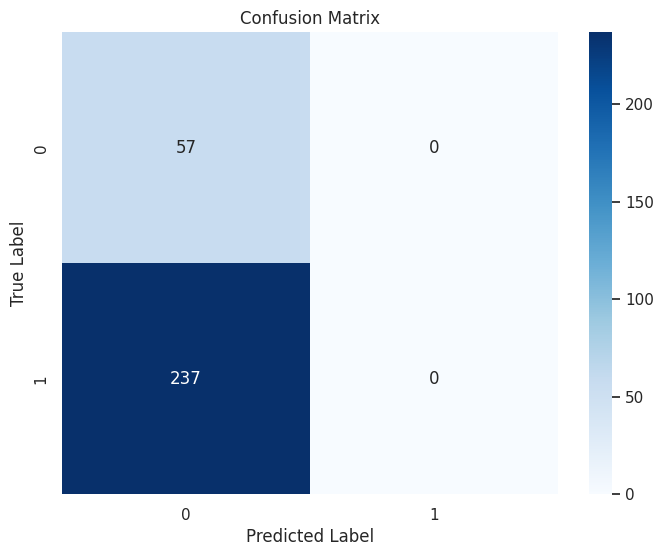

In [ ]:
'''# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
'''

Training Accuracy: [0.39233577251434326, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062, 0.18978102505207062]
Validation Accuracy: [0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917, 0.12318840622901917]
Training Loss: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Validation Loss: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


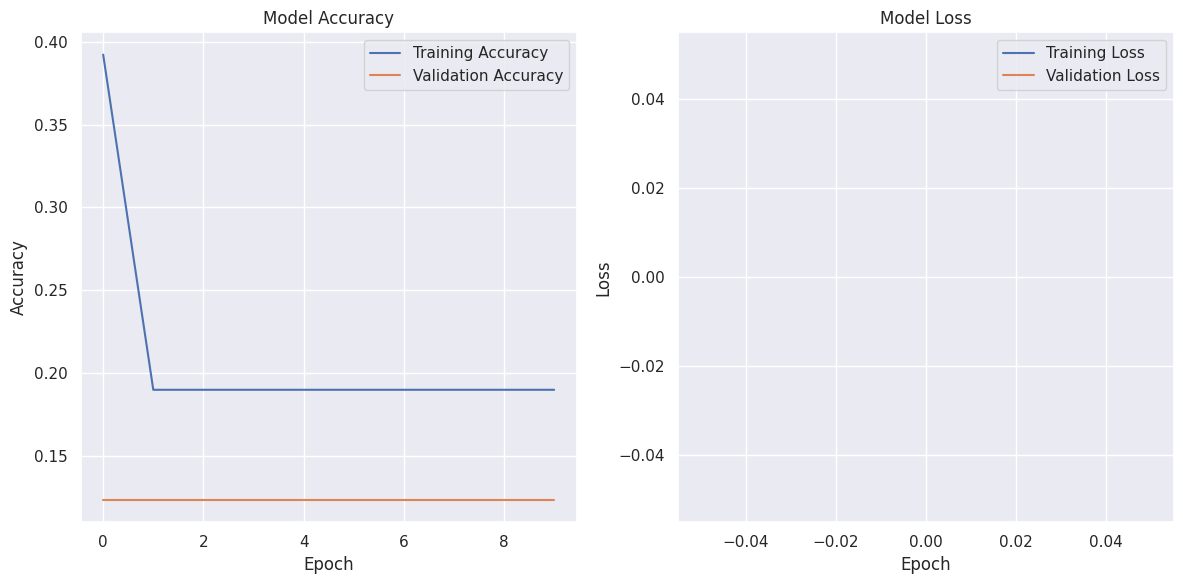

In [ ]:
'''# Plot training history and print accuracy and loss values
def plot_history(history):
    # Print accuracy and loss values
    print("Training Accuracy:", history.history['accuracy'])
    print("Validation Accuracy:", history.history['val_accuracy'])
    print("Training Loss:", history.history['loss'])
    print("Validation Loss:", history.history['val_loss'])

    # Plot the training history
    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history and print values
plot_history(history)
'''

In [ ]:
'''# Check if there are any NaN values in the dataset
print(np.any(np.isnan(X_train)), np.any(np.isnan(X_val)), np.any(np.isnan(X_test)))
'''

True True True


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shape of the resulting data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (548, 5, 20)
y_train shape: (548,)
X_val shape: (138, 5, 20)
y_val shape: (138,)
X_test shape: (294, 5, 20)
y_test shape: (294,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define an LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification, change activation for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5289 - loss: 0.6786 
Epoch 1: val_loss improved from inf to 0.40761, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6226 - loss: 0.6478 - val_accuracy: 0.9710 - val_loss: 0.4076
Epoch 2/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9487 - loss: 0.3732 
Epoch 2: val_loss improved from 0.40761 to 0.11580, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9429 - loss: 0.3492 - val_accuracy: 0.9783 - val_loss: 0.1158
Epoch 3/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9451 - loss: 0.1425 
Epoch 3: val_loss improved from 0.11580 to 0.05058, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9473 - loss: 0.1344 - val_accuracy: 0.9855 - val_loss: 0.0506
Epoch 4/50
 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9714 - loss: 0.0973  
Epoch 4: val_loss improved from 0.05058 to 0.04199, saving mod

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define a CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification, change activation for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8364 - loss: 0.5324 
Epoch 1: val_loss did not improve from 0.03093
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8468 - loss: 0.4851 - val_accuracy: 0.9348 - val_loss: 0.2037
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8881 - loss: 0.2333
Epoch 2: val_loss did not improve from 0.03093
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8889 - loss: 0.2319 - val_accuracy: 0.9638 - val_loss: 0.1109
Epoch 3/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9329 - loss: 0.1471  
Epoch 3: val_loss did not improve from 0.03093
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9330 - loss: 0.1458 - val_accuracy: 0.9783 - val_loss: 0.0759
Epoch 4/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9375 - loss: 0.1701
Epoch 4: val_loss did not improve from 0.03093
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9582 - loss: 0.1270 - val_accuracy: 0.9783 - val_loss: 0.0564
Epoch 5/5

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0171 
Test Loss: 0.01549276988953352
Test Accuracy: 0.9965986609458923


In [ ]:
# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Decode the predicted labels back to their original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred_binary.flatten())
print("Predicted labels:", y_pred_decoded)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Predicted labels: ['healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'faulty' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'faulty'
 'healthy' 'faulty' 'healthy' 'healthy' 'healthy' 'faulty' 'faulty'
 'healthy' 'healthy' 'faulty' 'faulty' 'faulty' 'healthy' 'healthy'
 'healthy' 'faulty' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'faulty' 'healthy' 'faulty'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'faulty'
 'healthy' 'healthy' 'healthy' 'faulty' 'healthy' 'faulty' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'faulty' 'healthy' 'faulty' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'hea

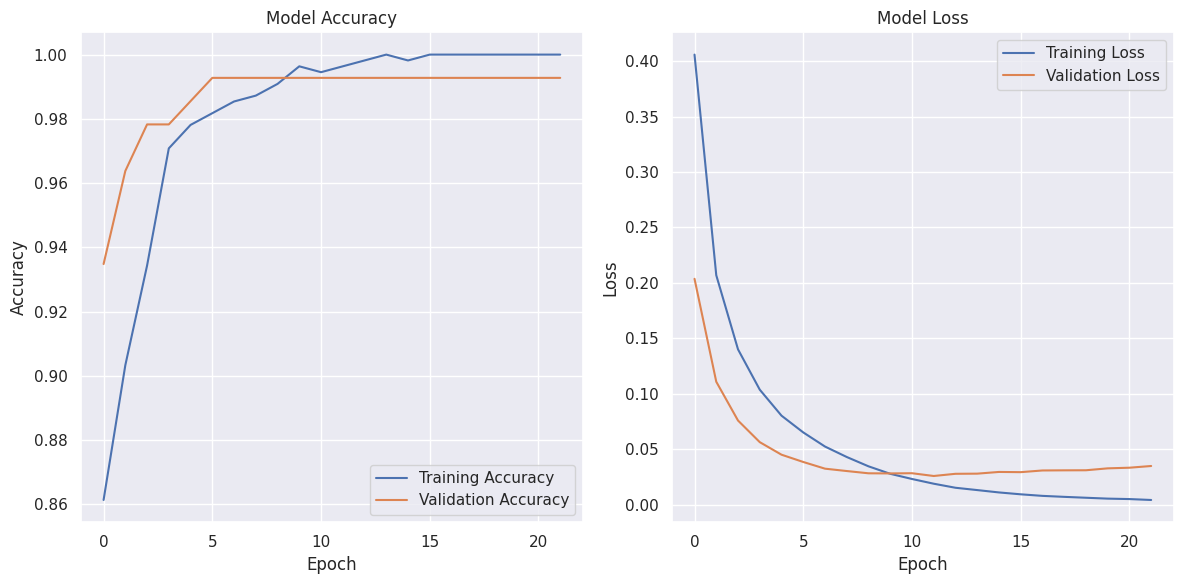

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


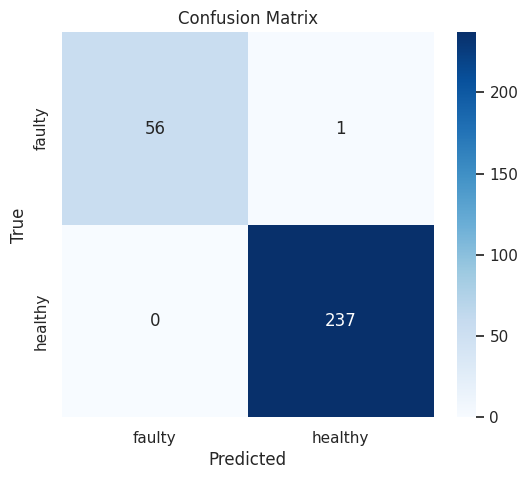

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_binary, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

      faulty       1.00      0.98      0.99        57
     healthy       1.00      1.00      1.00       237

    accuracy                           1.00       294
   macro avg       1.00      0.99      0.99       294
weighted avg       1.00      1.00      1.00       294



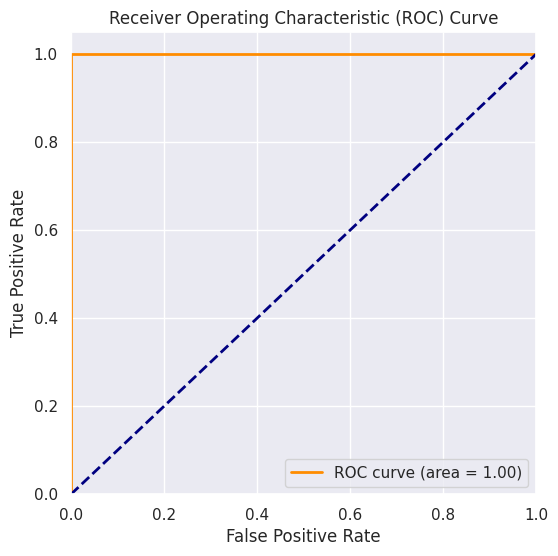

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


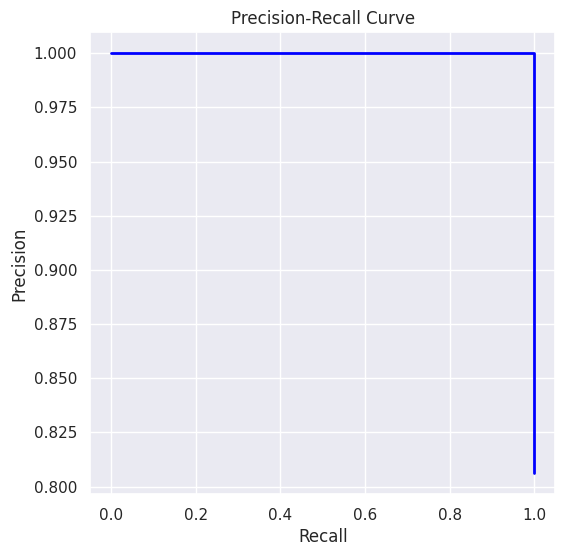

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Implementing CNN to get the accuracy scores for each of the bearings labelled

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Splitting the data into features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape the input data for CNN: (samples, timesteps, features)
# Here, we treat each row as a single "time step" and the number of features as input channels
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the CNN model
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(pool_size=1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4, activation='softmax')  # 4 classes (one for each bearing's label)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_cnn_model(input_shape)

# Train the model separately for each bearing's label
accuracy_scores = []

for i, bearing in enumerate(labels):
    print(f"\nTraining model for {bearing}...")

    # Train the model
    history = model.fit(X_train, y_train[:, i], epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test[:, i], y_pred)

    # Store the accuracy score
    accuracy_scores.append([bearing, accuracy])

# Create a DataFrame to display accuracy scores
accuracy_df = pd.DataFrame(accuracy_scores, columns=['Bearing', 'Accuracy Score'])
print("\nAccuracy Scores for Each Bearing:")
print(accuracy_df)


Training model for Bearing 1_label...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8323 - loss: 11.2174 - val_accuracy: 0.8481 - val_loss: 8.1268
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8504 - loss: 5.7040 - val_accuracy: 0.8734 - val_loss: 6.3894
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8947 - loss: 3.1091 - val_accuracy: 0.8797 - val_loss: 4.2849
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8828 - loss: 2.4243 - val_accuracy: 0.8797 - val_loss: 3.6412
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9119 - loss: 2.4988 - val_accuracy: 0.8671 - val_loss: 3.1915
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8627 - loss: 2.9101 - val_accuracy: 0.8734 - val_loss: 3.2095
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 1.4863 - val_accuracy: 0.8861 - val_loss: 2.4998
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8835 - loss: 1.6639 - val_accuracy: 0.8671 - val_loss: 3.1031
E

Implementing classical ML models

Linear Logistic Regression model without cross-validation technique:
Observation: Since the data is imbalanced hence it is highly possible that the model is overfitting and then just labelling the test set data instead of actually learning to generate them thus we see it behaving perfectly with 100% accuracy, precision, F1 and recall.In the next step this issue will be addressed using the k-fold cross-validation technique.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Splitting the data into features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=100)

# To store results
metrics = {}
confusion_matrices = {}

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nTraining Logistic Regression model for {bearing}...")

    # Fit the model for the current bearing
    model.fit(X_train, y_train[:, i])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test[:, i], y_pred)
    precision = precision_score(y_test[:, i], y_pred, zero_division=1)
    recall = recall_score(y_test[:, i], y_pred, zero_division=1)
    f1 = f1_score(y_test[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y_test[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Print confusion matrices for each bearing
for bearing in labels:
    print(f"\nConfusion Matrix for {bearing}:")
    print(confusion_matrices[bearing])



Training Logistic Regression model for Bearing 1_label...

Training Logistic Regression model for Bearing 2_label...

Training Logistic Regression model for Bearing 3_label...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Training Logistic Regression model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix for Bearing 1_label:
[[ 52   2]
 [  0 242]]

Confusion Matrix for Bearing 2_label:
[[ 29   1]
 [  0 266]]

Confusion Matrix for Bearing 3_label:
[[ 27   0]
 [  0 269]]

Confusion Matrix for Bearing 4_label:
[[ 31   2]
 [  0 263]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Implementing Linear logistic Regression Model with the cross-validation technique - This to some extent is handling the overfitting problem
However, from the confusion matrix it is observed that for bearing_4 it is mostly misclassifying the faulty ones as healthy which is concerning and indicates that the overfitting problem is not completely tackled here


Evaluating Logistic Regression model for Bearing 1_label...

Evaluating Logistic Regression model for Bearing 2_label...

Evaluating Logistic Regression model for Bearing 3_label...

Evaluating Logistic Regression model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.99
F1 Score: 0.99
ROC-AUC Score: 0.93


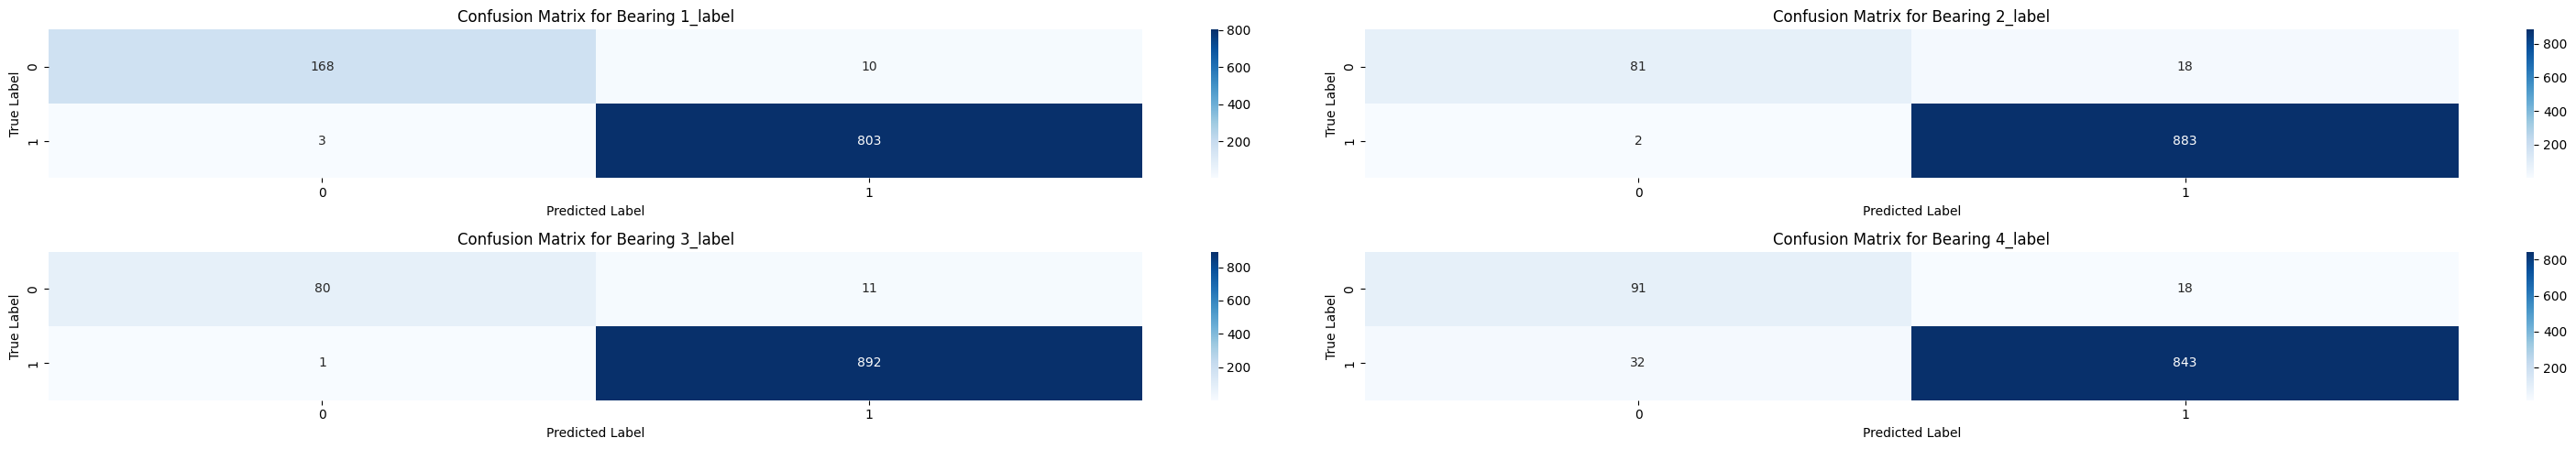

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# To store results
metrics = {}
confusion_matrices = {}

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating Logistic Regression model for {bearing}...")

    # Perform cross-validation predictions
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    roc_auc = roc_auc_score(y[:, i], y_pred) #- roc
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc #roc
    }
    confusion_matrices[bearing] = cm

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])
overall_roc_auc = np.mean([metrics[b]['roc_auc'] for b in labels]) #roc

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")
print(f"ROC-AUC Score: {overall_roc_auc:.2f}") #ROC

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 2, figsize=(30, 5))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i]
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


Random Forest: It is observed that the rate of false positives is less as compared to linear logistic regression model.


Evaluating Random Forest model for Bearing 1_label...

Evaluating Random Forest model for Bearing 2_label...

Evaluating Random Forest model for Bearing 3_label...

Evaluating Random Forest model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 1.00
F1 Score: 0.99


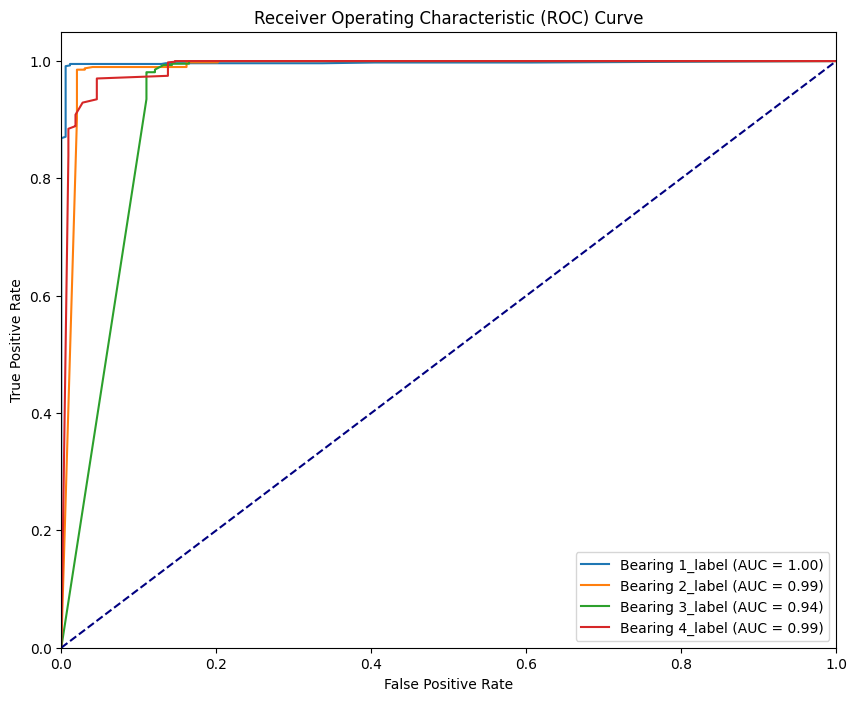

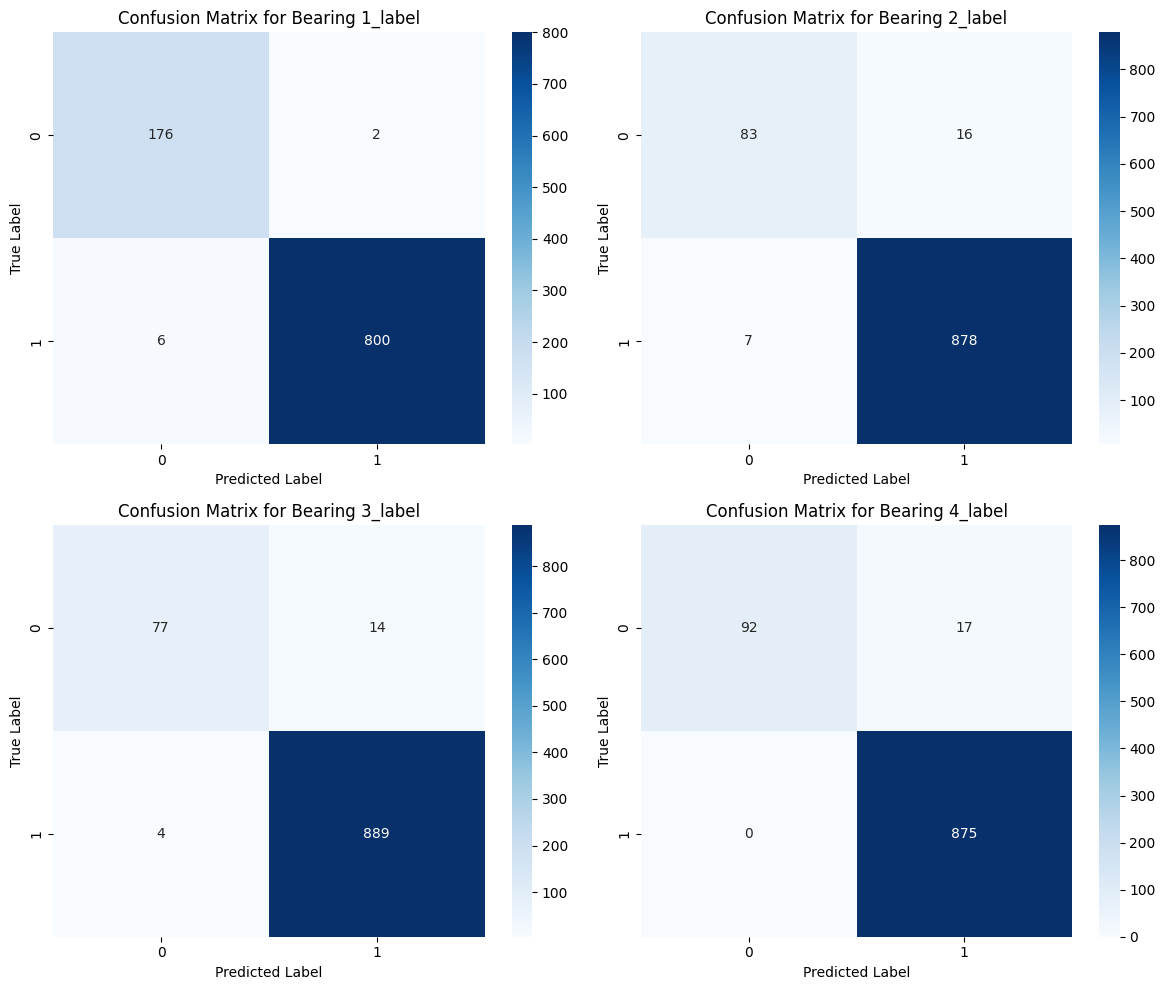

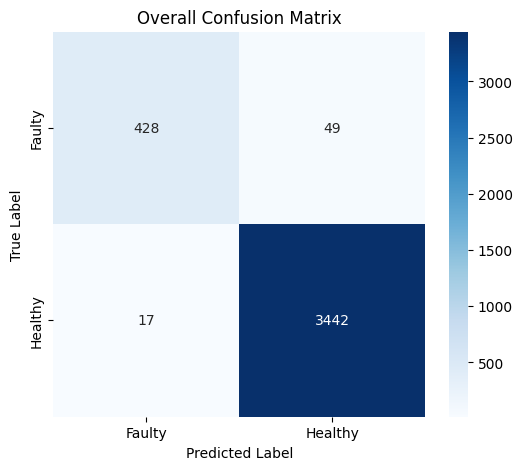

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# To store results
metrics = {}
confusion_matrices = {}

# Create subplots for ROC curve and confusion matrices
fig_roc, ax_roc = plt.subplots(figsize=(10, 8))
fig_cm, axes_cm = plt.subplots(2, 2, figsize=(12, 10))
axes_cm = axes_cm.ravel()

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating Random Forest model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Compute evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax_roc.plot(fpr, tpr, label=f'{bearing} (AUC = {roc_auc:.2f})')

    # Plot confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes_cm[i]
    )
    axes_cm[i].set_title(f"Confusion Matrix for {bearing}")
    axes_cm[i].set_xlabel("Predicted Label")
    axes_cm[i].set_ylabel("True Label")

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Display ROC plot
ax_roc.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic (ROC) Curve')
ax_roc.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Plot overall confusion matrix
overall_cm = np.sum([confusion_matrices[b] for b in labels], axis=0)
plt.figure(figsize=(6, 5))
sns.heatmap(
    overall_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Faulty', 'Healthy'],
    yticklabels=['Faulty', 'Healthy']
)
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Decision Tree: the issue with of false positive prediction still continues


Evaluating Decision Tree model for Bearing 1_label...

Evaluating Decision Tree model for Bearing 2_label...

Evaluating Decision Tree model for Bearing 3_label...

Evaluating Decision Tree model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99


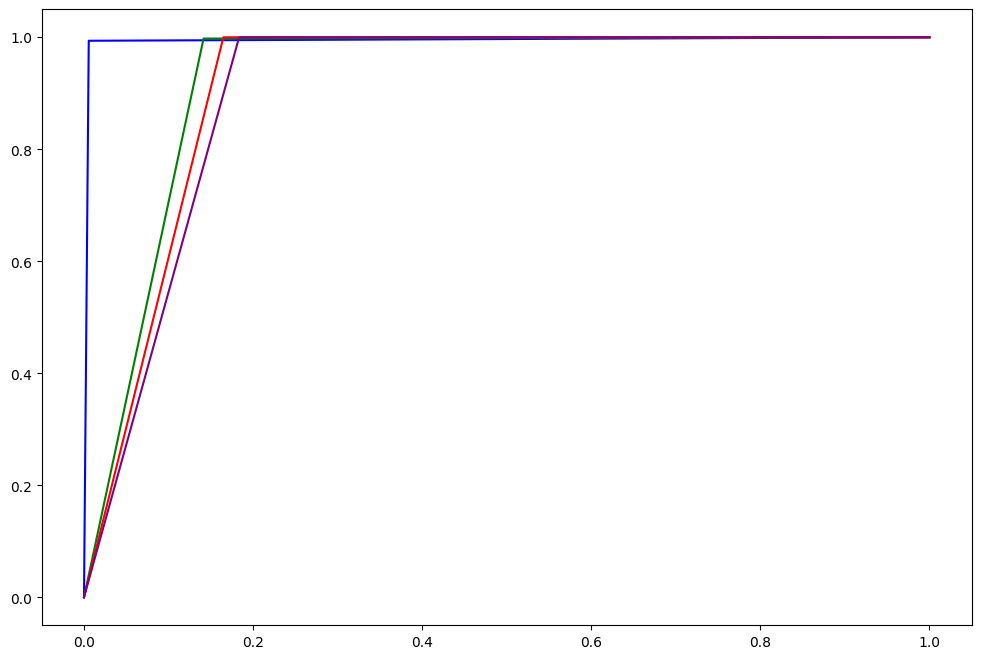

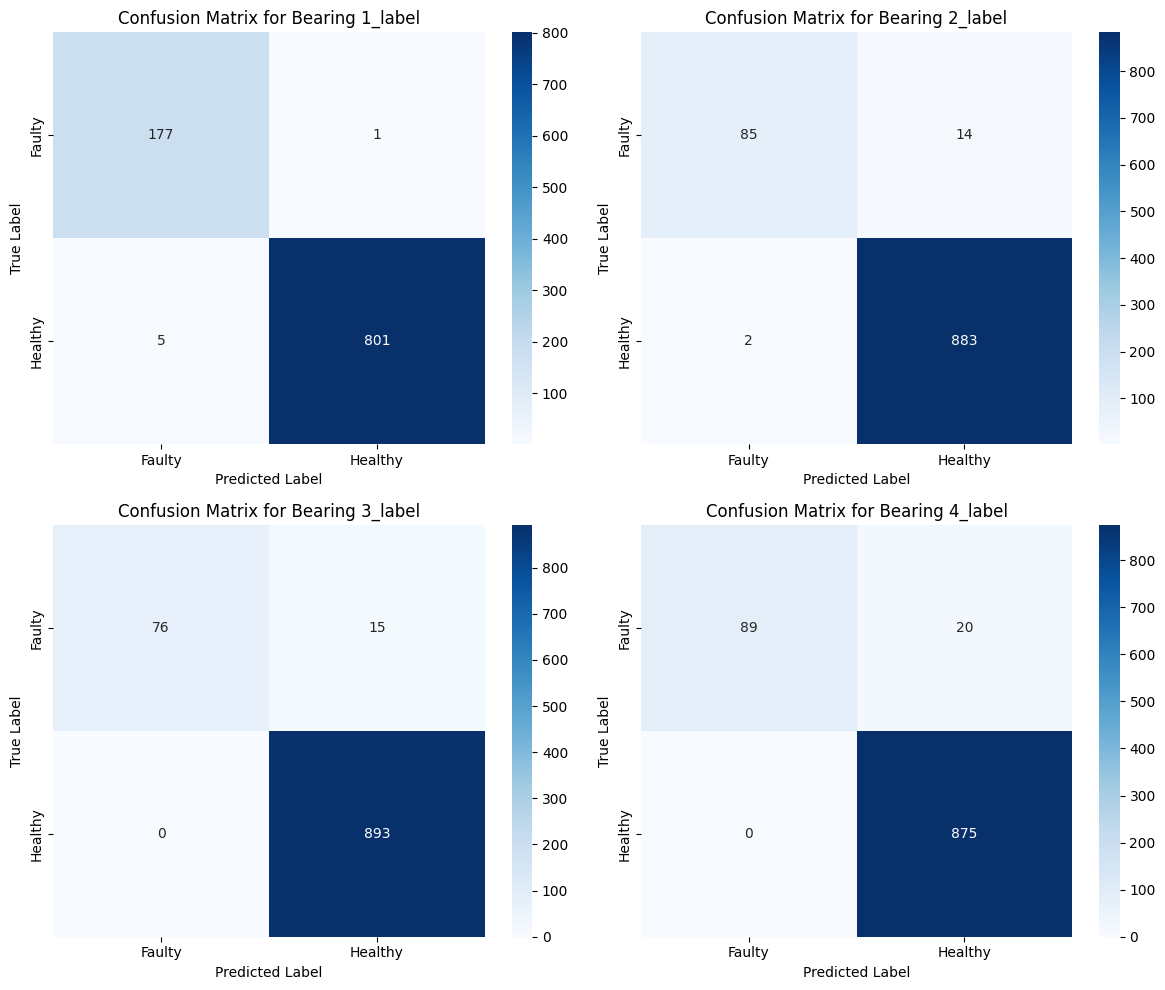

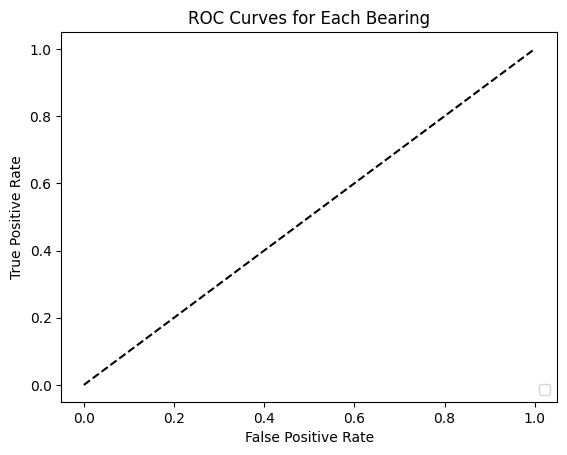

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# To store results
metrics = {}
confusion_matrices = {}

# Initialize plot for ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating Decision Tree model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], label=f'{bearing} (AUC = {roc_auc:.2f})')

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i]
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

    # Set custom tick labels (0 = faulty, 1 = healthy)
    axes[i].set_xticklabels(['Faulty', 'Healthy'])
    axes[i].set_yticklabels(['Faulty', 'Healthy'])

plt.tight_layout()
plt.show()

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Bearing")
plt.legend(loc="lower right")
plt.show()


Decision tree implementation and plotting the confusion matrix for the overall data - there are 984 instances of each of the four bearings so the overall is calculated by aggregating the numbers from each of the bearing's confusion matrix


Evaluating Decision Tree model for Bearing 1_label...

Evaluating Decision Tree model for Bearing 2_label...

Evaluating Decision Tree model for Bearing 3_label...

Evaluating Decision Tree model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99


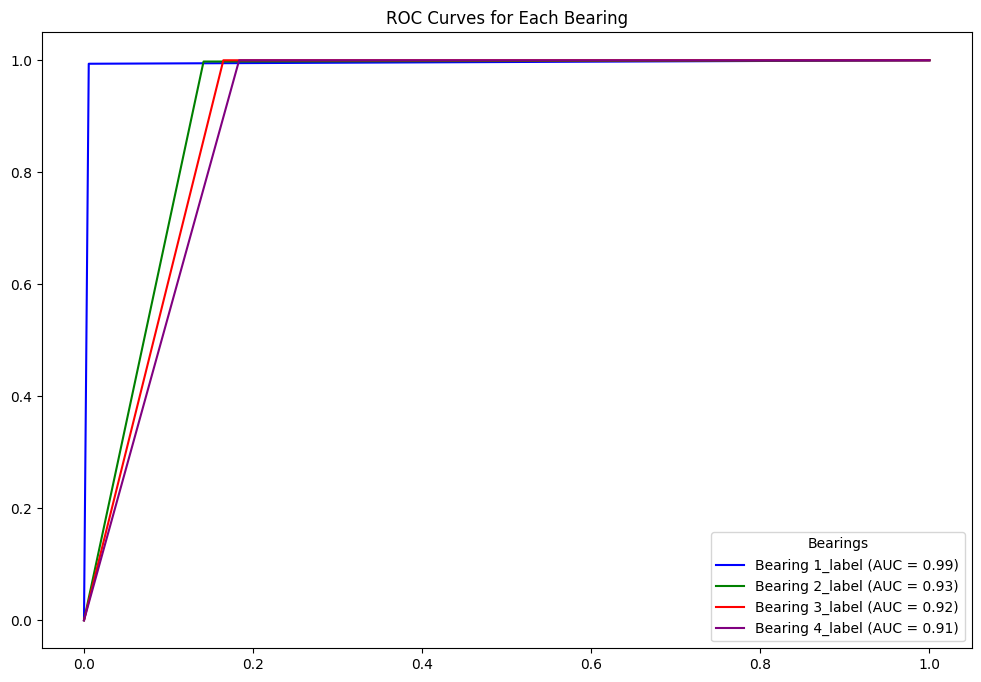

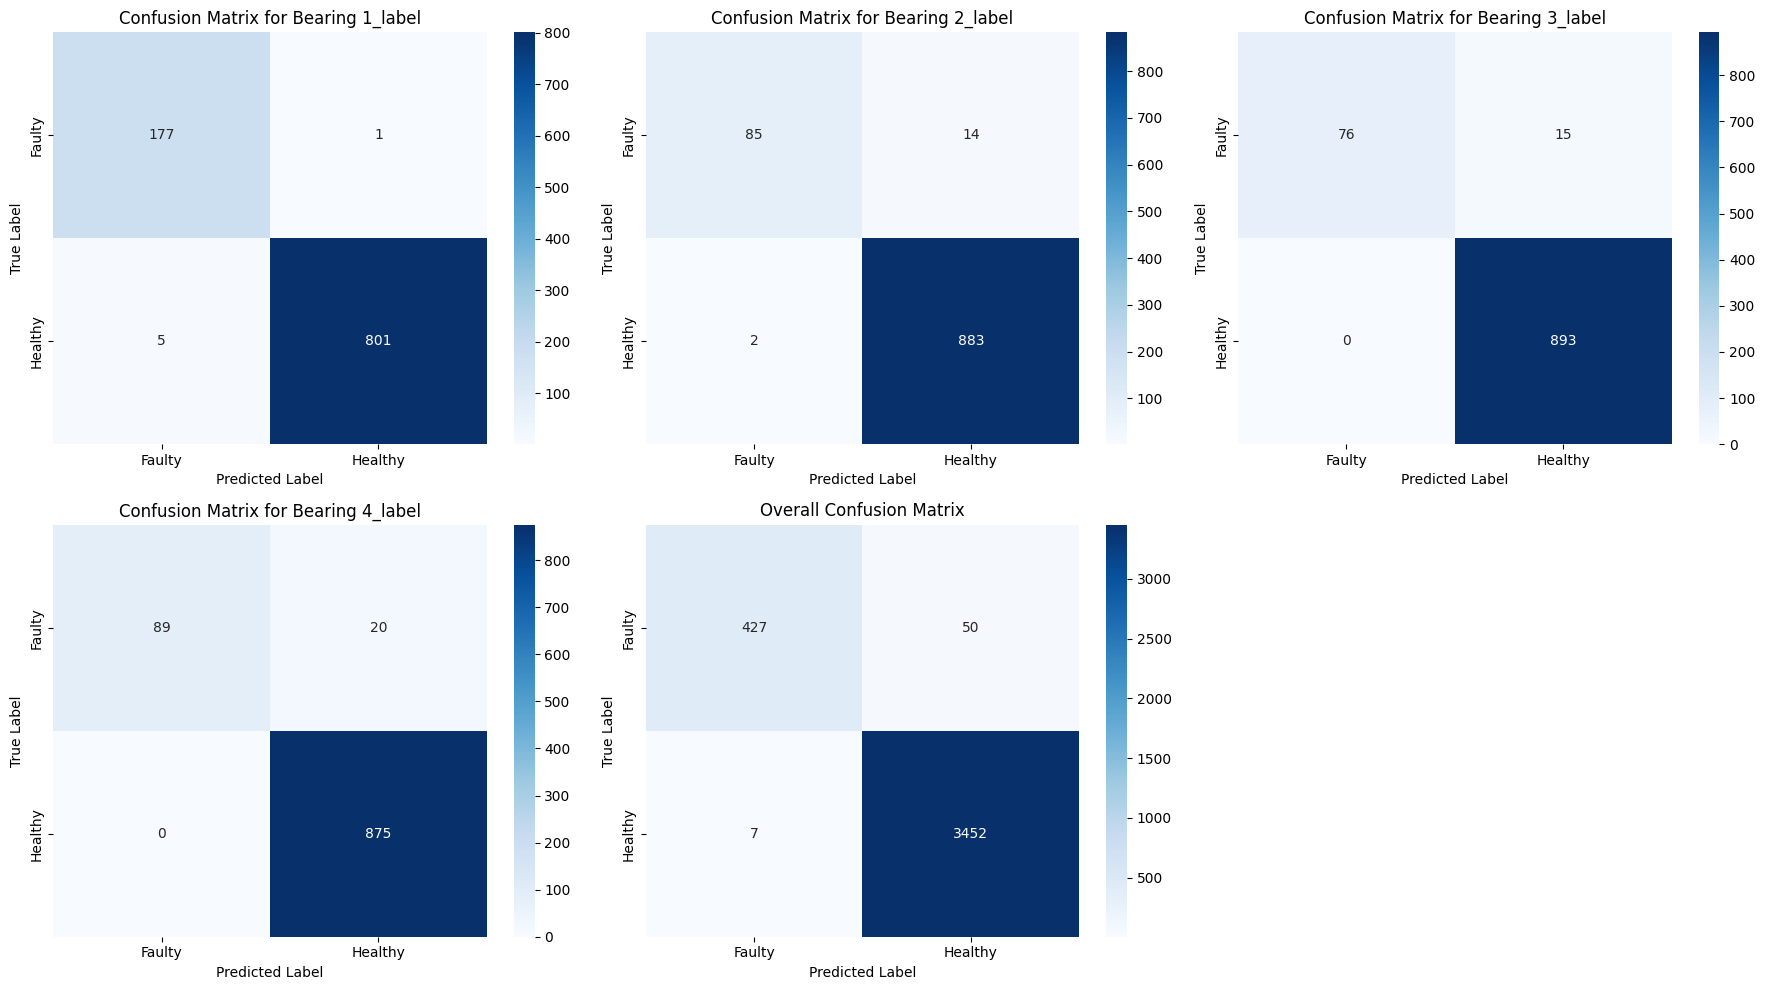

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# To store results
metrics = {}
confusion_matrices = {}

# Initialize plot for ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']

# Aggregate predictions and true labels for overall confusion matrix
all_true = []
all_pred = []

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating Decision Tree model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # Aggregate true labels and predictions
    all_true.extend(y[:, i])
    all_pred.extend(y_pred)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color=colors[i], label=f'{bearing} (AUC = {roc_auc:.2f})')
    plt.legend(title="Bearings", loc="lower right", fontsize=10)
    plt.title("ROC Curves for Each Bearing")

# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(all_true, all_pred)

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i]
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

    # Set custom tick labels (0 = faulty, 1 = healthy)
    axes[i].set_xticklabels(['Faulty', 'Healthy'])
    axes[i].set_yticklabels(['Faulty', 'Healthy'])

# Plot the overall confusion matrix
sns.heatmap(
    overall_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[4]
)
axes[4].set_title("Overall Confusion Matrix")
axes[4].set_xlabel("Predicted Label")
axes[4].set_ylabel("True Label")
axes[4].set_xticklabels(['Faulty', 'Healthy'])
axes[4].set_yticklabels(['Faulty', 'Healthy'])

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Finalize ROC curve plot
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curves for Each Bearing")
#plt.legend(loc="lower right")
#plt.show()


Printing the split of healthy & faulty parts in each of the bearings data

In [ ]:
# Assuming 'Bearing 1_label' is already encoded as 0 = Faulty and 1 = Healthy
faulty_count = (df['Bearing 1_label'] == 0).sum()
healthy_count = (df['Bearing 1_label'] == 1).sum()

print(f"Faulty instances for Bearing 1: {faulty_count}")
print(f"Healthy instances for Bearing 1: {healthy_count}")


Faulty instances for Bearing 1: 178
Healthy instances for Bearing 1: 806


In [ ]:
# Assuming 'Bearing 1_label' is already encoded as 0 = Faulty and 1 = Healthy
faulty_count = (df['Bearing 2_label'] == 0).sum()
healthy_count = (df['Bearing 2_label'] == 1).sum()

print(f"Faulty instances for Bearing 2: {faulty_count}")
print(f"Healthy instances for Bearing 2: {healthy_count}")


Faulty instances for Bearing 2: 99
Healthy instances for Bearing 2: 885


In [ ]:
# Assuming 'Bearing 1_label' is already encoded as 0 = Faulty and 1 = Healthy
faulty_count = (df['Bearing 3_label'] == 0).sum()
healthy_count = (df['Bearing 3_label'] == 1).sum()

print(f"Faulty instances for Bearing 3: {faulty_count}")
print(f"Healthy instances for Bearing 3: {healthy_count}")


Faulty instances for Bearing 3: 91
Healthy instances for Bearing 3: 893


In [ ]:
# Assuming 'Bearing 1_label' is already encoded as 0 = Faulty and 1 = Healthy
faulty_count = (df['Bearing 4_label'] == 0).sum()
healthy_count = (df['Bearing 4_label'] == 1).sum()

print(f"Faulty instances for Bearing 4: {faulty_count}")
print(f"Healthy instances for Bearing 4: {healthy_count}")


Faulty instances for Bearing 4: 109
Healthy instances for Bearing 4: 875


Naive Bayes - this model is not a good fit for this kind of data as we can see that the rate of false positives is quite high for both the "healthy" and "faulty" classes


Evaluating Naive Bayes model for Bearing 1_label...

Evaluating Naive Bayes model for Bearing 2_label...

Evaluating Naive Bayes model for Bearing 3_label...

Evaluating Naive Bayes model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.93
Precision: 0.97
Recall: 0.95
F1 Score: 0.96


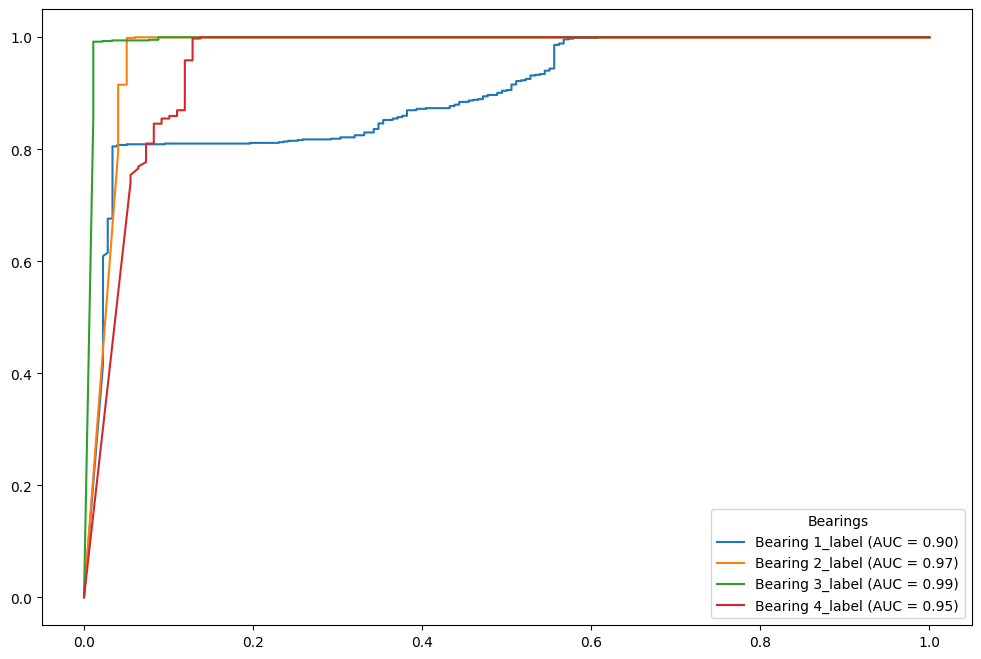

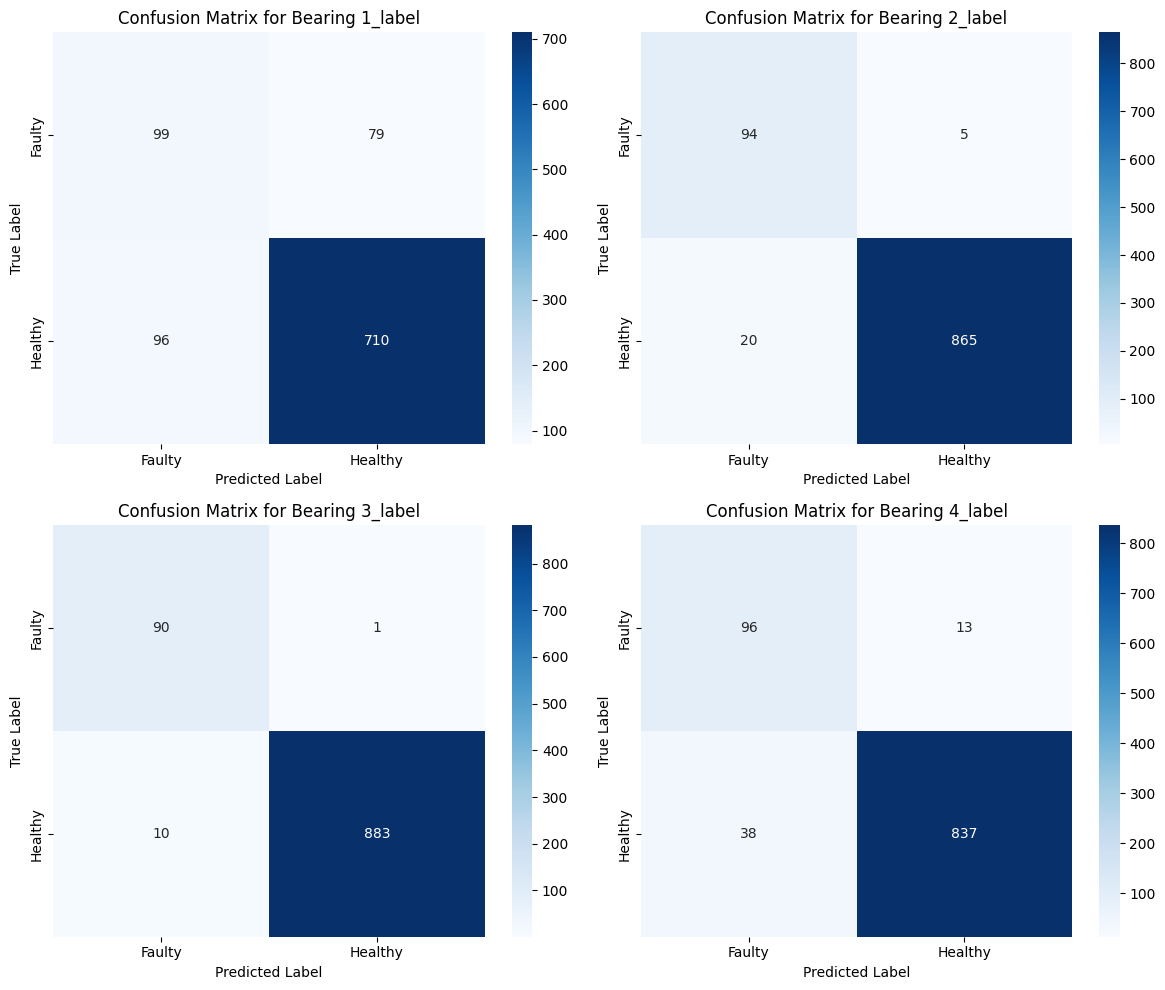

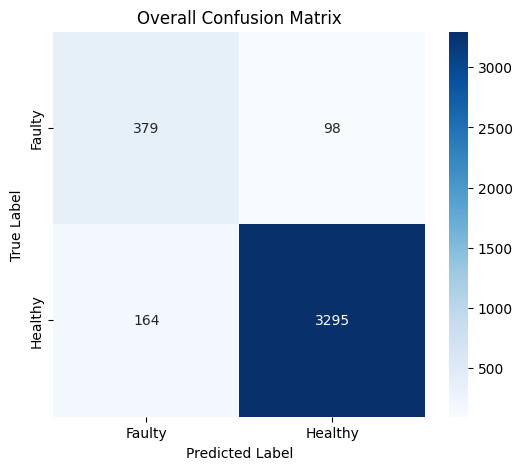

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize Naive Bayes model
model = GaussianNB()

# To store results
metrics = {}
confusion_matrices = {}

# Initialize plot for ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']
roc_legend_labels = []

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating Naive Bayes model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{bearing} (AUC = {roc_auc:.2f})')
    plt.legend(title="Bearings", loc="lower right", fontsize=10)
    #plt.plot(fpr, tpr, color=colors[i], label=f'{bearing} (AUC = {roc_auc:.2f})')
    #roc_legend_labels.append(f'{bearing} (AUC = {roc_auc:.2f})')

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i],
        xticklabels=['Faulty', 'Healthy'],
        yticklabels=['Faulty', 'Healthy']
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Finalize ROC curve plot
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curves for Each Bearing")
#plt.legend(loc="lower right")
#plt.legend(title="Bearings", loc="lower right", fontsize=10)
#plt.show()


# Plot overall confusion matrix
overall_cm = np.sum([confusion_matrices[b] for b in labels], axis=0)
plt.figure(figsize=(6, 5))
sns.heatmap(
    overall_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Faulty', 'Healthy'],
    yticklabels=['Faulty', 'Healthy']
)
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


XGBoost: It has similar performance score when compared to Decision tree. However, this model predicts the Bearing_1 perfectly


Evaluating XGBoost model for Bearing 1_label...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating XGBoost model for Bearing 2_label...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating XGBoost model for Bearing 3_label...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating XGBoost model for Bearing 4_label...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:02:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Overall Evaluation Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99


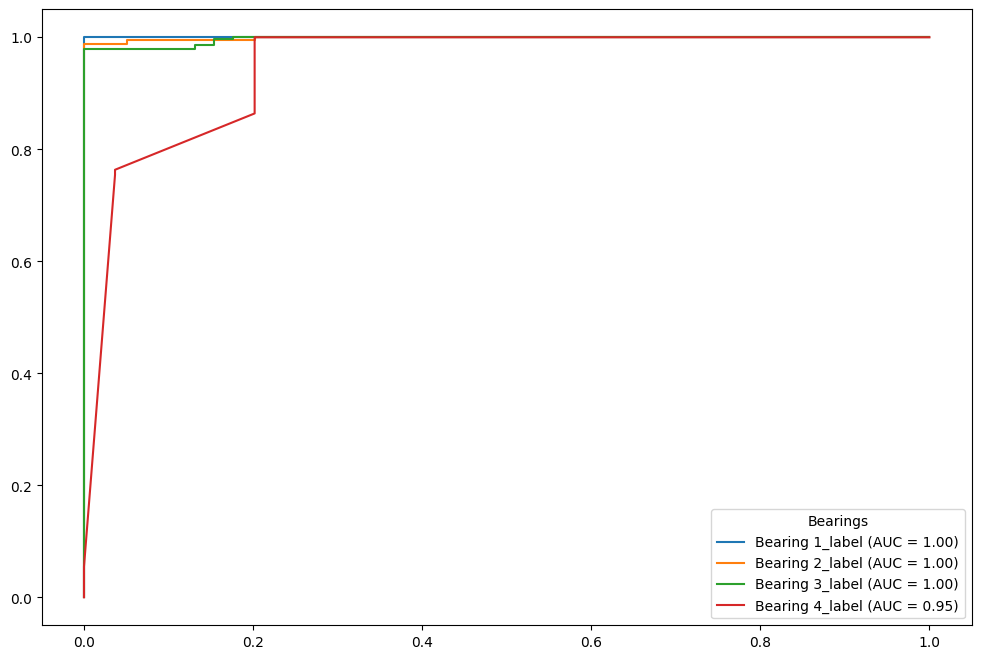

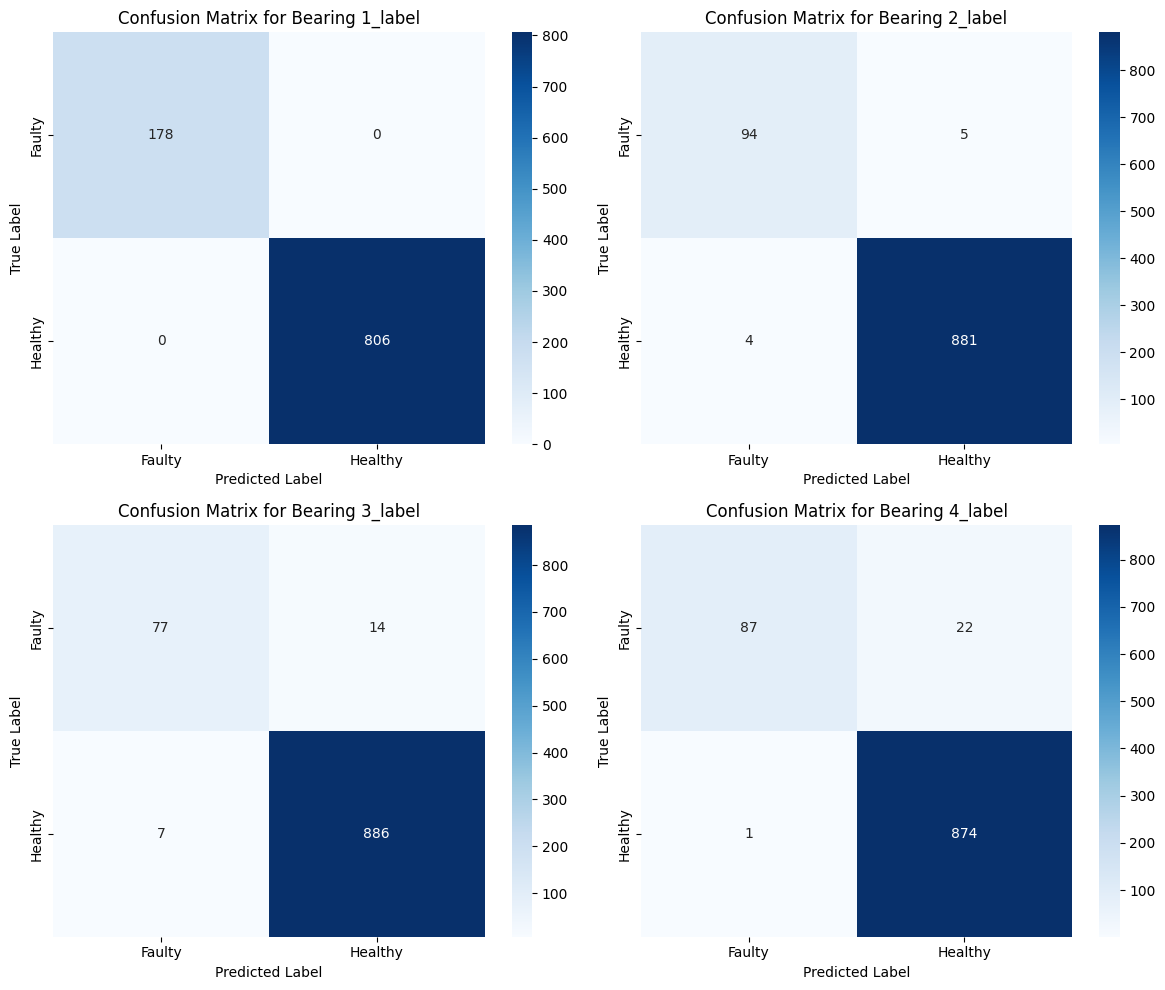

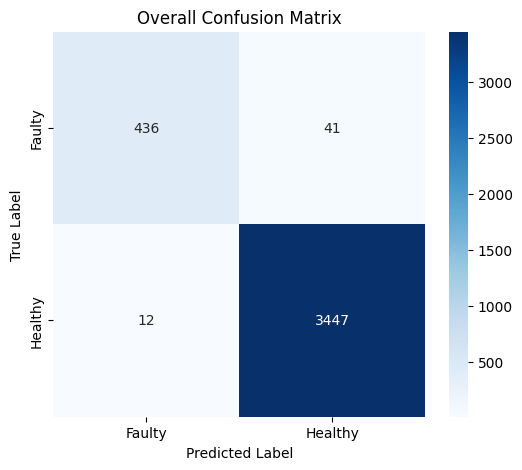

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from xgboost import XGBClassifier

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# To store results
metrics = {}
confusion_matrices = {}

# Initialize plot for ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating XGBoost model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{bearing} (AUC = {roc_auc:.2f})')
    plt.legend(title="Bearings", loc="lower right", fontsize=10)

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i],
        xticklabels=['Faulty', 'Healthy'],
        yticklabels=['Faulty', 'Healthy']
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Finalize ROC curve plot
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curves for Each Bearing")
#plt.legend(title="Bearings", loc="lower right", fontsize=10)
#plt.show()

# Plot overall confusion matrix
overall_cm = np.sum([confusion_matrices[b] for b in labels], axis=0)
plt.figure(figsize=(6, 5))
sns.heatmap(
    overall_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Faulty', 'Healthy'],
    yticklabels=['Faulty', 'Healthy']
)
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Reading the Raw vibration data

In [ ]:
merged_data_df = pd.read_excel("merged_data.xlsx")

In [ ]:
merged_data_df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,0.058333,0.071832,0.083242,0.043067
1,0.058995,0.074006,0.084435,0.044541
2,0.060236,0.074227,0.083926,0.044443
3,0.061455,0.073844,0.084457,0.045081
4,0.061361,0.075609,0.082837,0.045118


KNN which is a simple classification method is not suitable for this dataset as it is failing to correctly predict both the classes


Evaluating KNN model for Bearing 1_label...

Evaluating KNN model for Bearing 2_label...

Evaluating KNN model for Bearing 3_label...

Evaluating KNN model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.91
Precision: 0.95
Recall: 0.94
F1 Score: 0.95


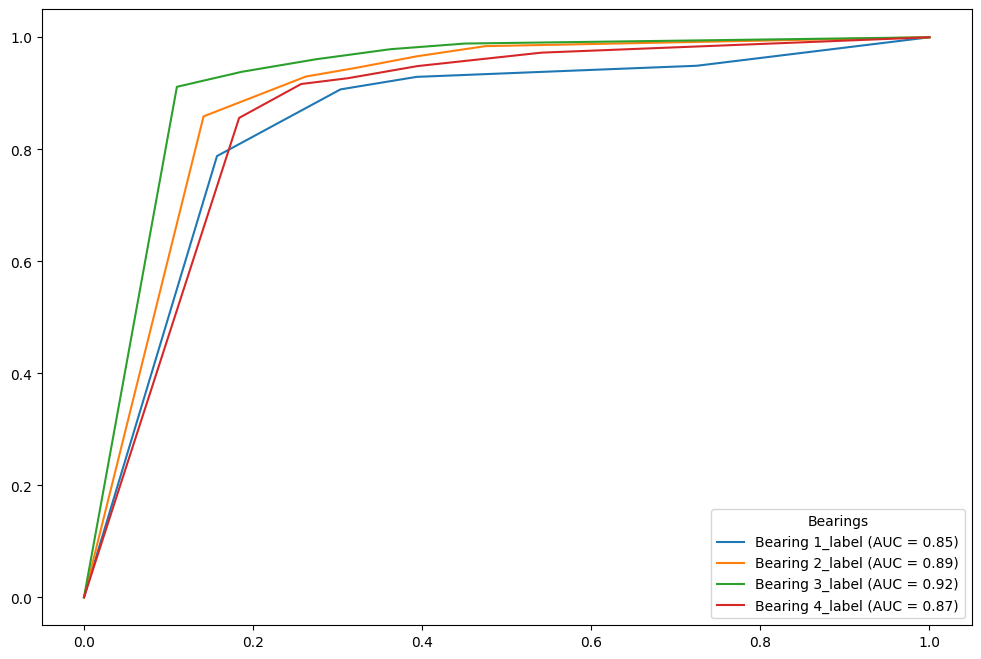

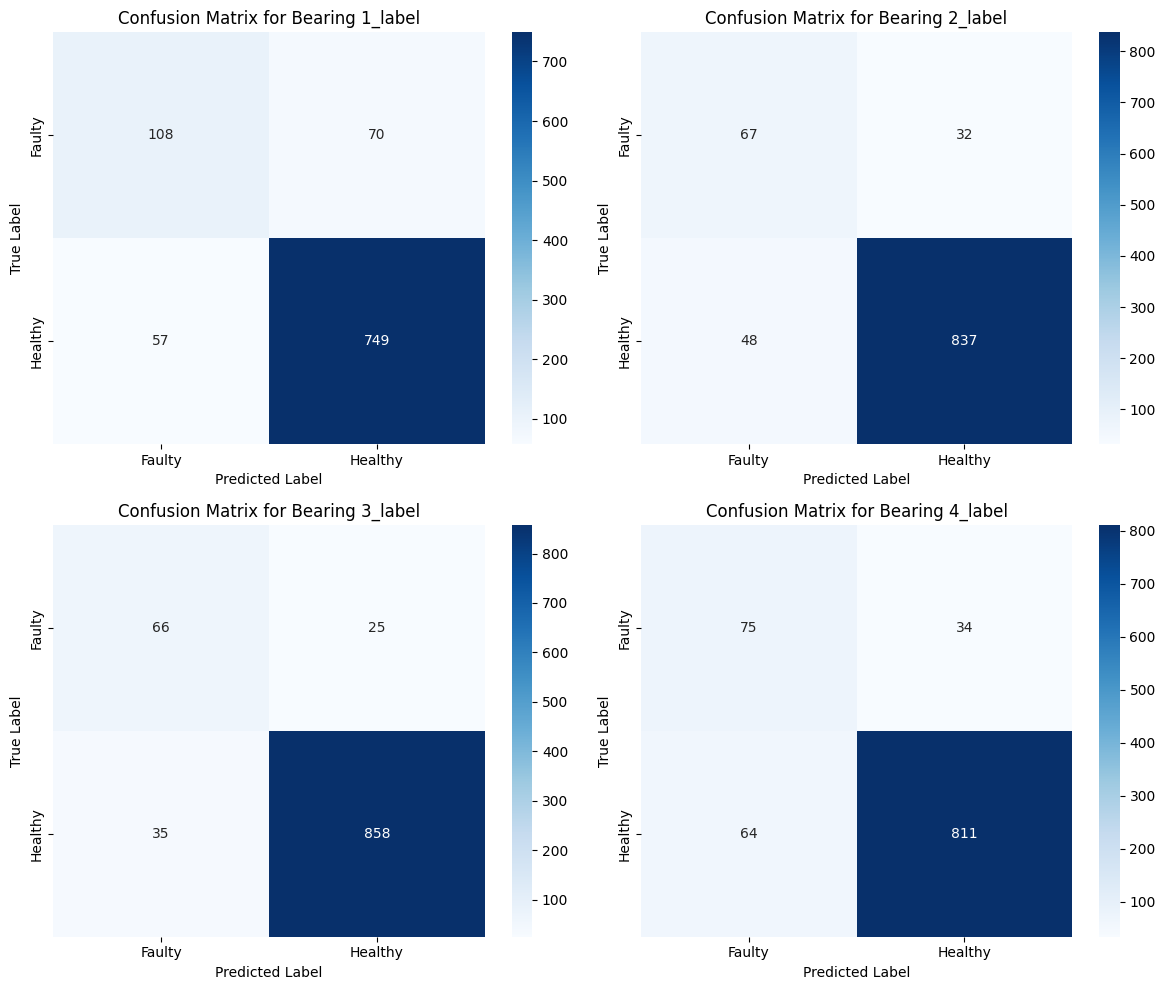

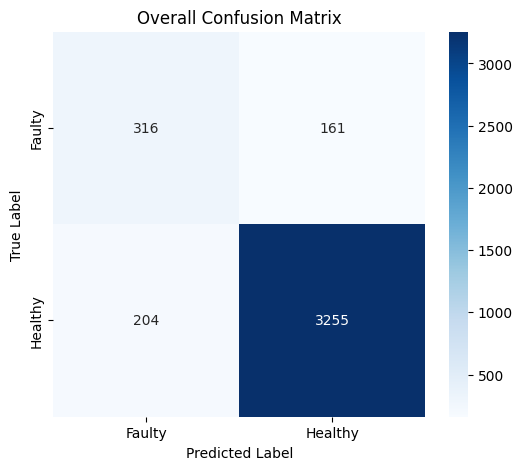

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.neighbors import KNeighborsClassifier

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize KNN model
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# To store results
metrics = {}
confusion_matrices = {}

# Initialize plot for ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating KNN model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{bearing} (AUC = {roc_auc:.2f})')
    plt.legend(title="Bearings", loc="lower right", fontsize=10)

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i],
        xticklabels=['Faulty', 'Healthy'],
        yticklabels=['Faulty', 'Healthy']
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Finalize ROC curve plot
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curves for Each Bearing")
#plt.legend(title="Bearings", loc="lower right", fontsize=10)
#plt.show()

# Plot overall confusion matrix
overall_cm = np.sum([confusion_matrices[b] for b in labels], axis=0)
plt.figure(figsize=(6, 5))
sns.heatmap(
    overall_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Faulty', 'Healthy'],
    yticklabels=['Faulty', 'Healthy']
)
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


SVM


Evaluating SVM model for Bearing 1_label...

Evaluating SVM model for Bearing 2_label...

Evaluating SVM model for Bearing 3_label...

Evaluating SVM model for Bearing 4_label...

Overall Evaluation Metrics:
Accuracy: 0.92
Precision: 0.96
Recall: 0.95
F1 Score: 0.95


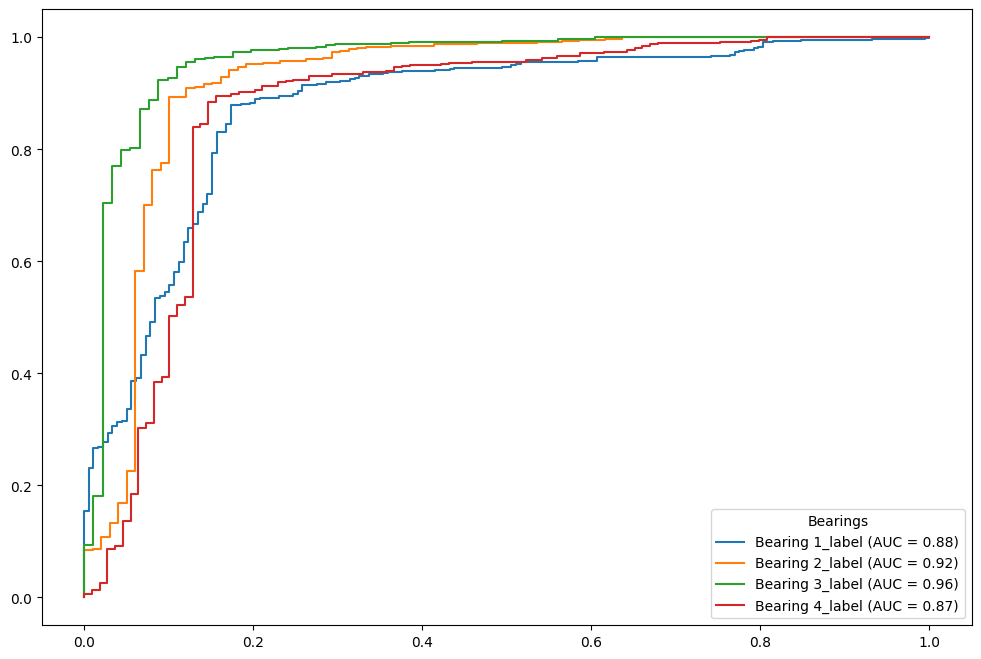

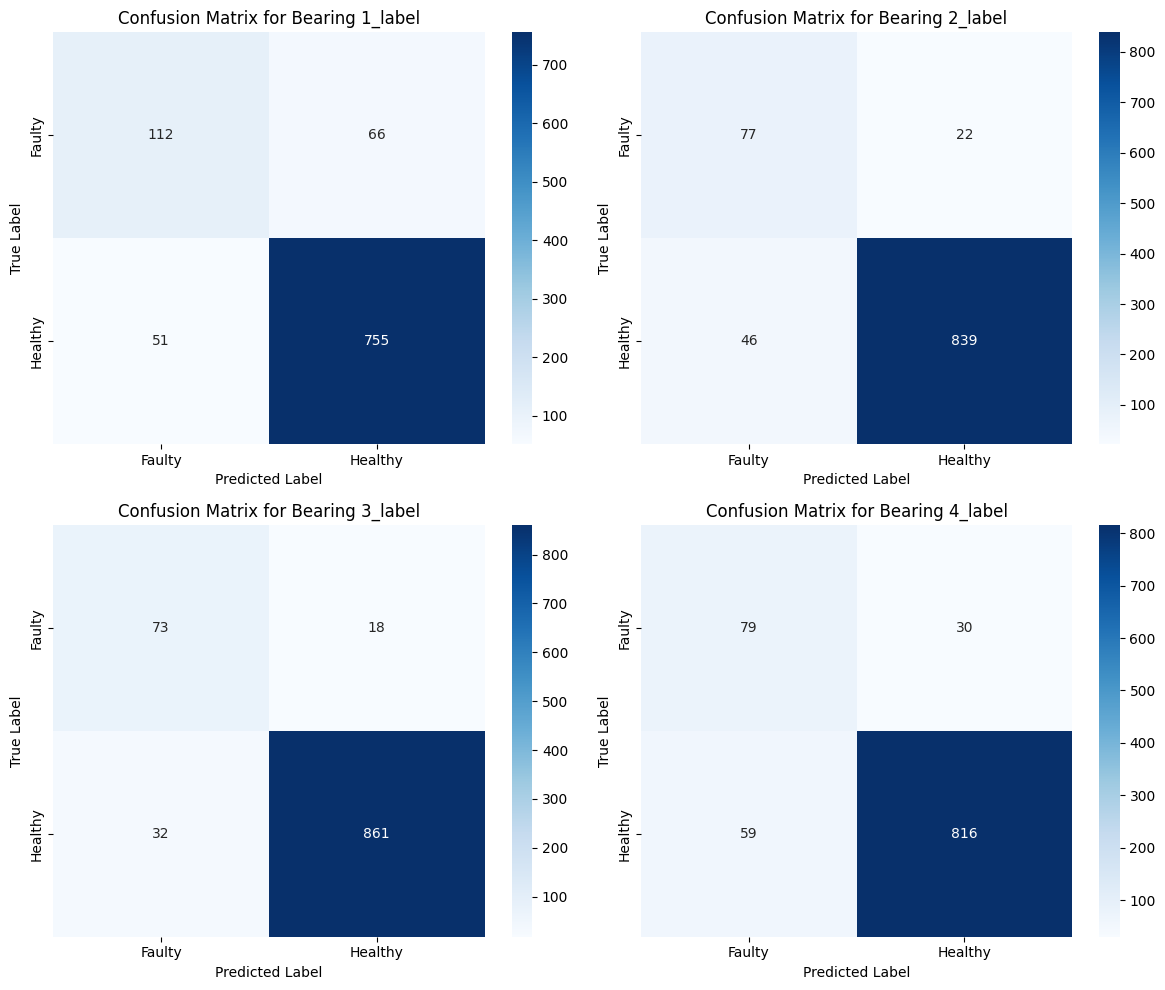

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

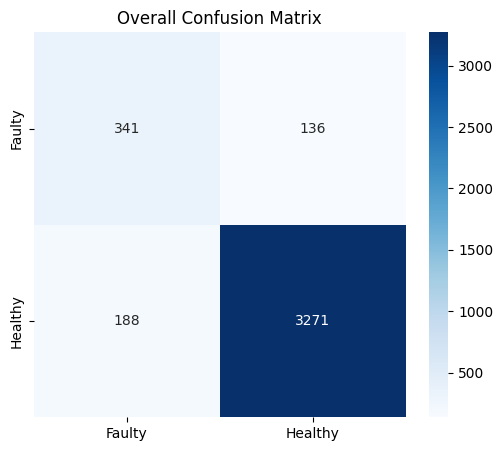

In [ ]:
from sklearn.svm import SVC

# Define the features and labels
features = [
    'Bearing 1_rms', 'Bearing 1_entropy', 'Bearing 1_kurtosis', 'Bearing 1_energy',
    'Bearing 2_rms', 'Bearing 2_entropy', 'Bearing 2_kurtosis', 'Bearing 2_energy',
    'Bearing 3_rms', 'Bearing 3_entropy', 'Bearing 3_kurtosis', 'Bearing 3_energy',
    'Bearing 4_rms', 'Bearing 4_entropy', 'Bearing 4_kurtosis', 'Bearing 4_energy'
]

labels = [
    'Bearing 1_label', 'Bearing 2_label', 'Bearing 3_label', 'Bearing 4_label'
]

# Encoding the labels ('healthy' -> 1, 'faulty' -> 0)
label_encoders = {}
for label in labels:
    le = LabelEncoder()
    df[label] = le.fit_transform(df[label])
    label_encoders[label] = le

# Define the features (X) and labels (y)
X = df[features].values
y = df[labels].values

# Initialize SVM model with probability=True to get probabilities for ROC curve
model = SVC(kernel='rbf', probability=True)  # You can adjust kernel to 'linear', 'poly', 'rbf', etc.

# To store results
metrics = {}
confusion_matrices = {}

# Initialize plot for ROC curves
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']

# Iterate over each bearing using integer indices
for i, bearing in enumerate(labels):
    print(f"\nEvaluating SVM model for {bearing}...")

    # Perform cross-validation predictions
    y_prob = cross_val_predict(model, X, y[:, i], cv=5, method='predict_proba')
    y_pred = cross_val_predict(model, X, y[:, i], cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y[:, i], y_pred)
    precision = precision_score(y[:, i], y_pred, zero_division=1)
    recall = recall_score(y[:, i], y_pred, zero_division=1)
    f1 = f1_score(y[:, i], y_pred, zero_division=1)
    cm = confusion_matrix(y[:, i], y_pred)

    # Store metrics
    metrics[bearing] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    confusion_matrices[bearing] = cm

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y[:, i], y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{bearing} (AUC = {roc_auc:.2f})')
    plt.legend(title="Bearings", loc="lower right", fontsize=10)

# Print the overall metrics
print("\nOverall Evaluation Metrics:")
overall_accuracy = np.mean([metrics[b]['accuracy'] for b in labels])
overall_precision = np.mean([metrics[b]['precision'] for b in labels])
overall_recall = np.mean([metrics[b]['recall'] for b in labels])
overall_f1 = np.mean([metrics[b]['f1_score'] for b in labels])

print(f"Accuracy: {overall_accuracy:.2f}")
print(f"Precision: {overall_precision:.2f}")
print(f"Recall: {overall_recall:.2f}")
print(f"F1 Score: {overall_f1:.2f}")

# Plot confusion matrices for each bearing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, bearing in enumerate(labels):
    sns.heatmap(
        confusion_matrices[bearing],
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i],
        xticklabels=['Faulty', 'Healthy'],
        yticklabels=['Faulty', 'Healthy']
    )
    axes[i].set_title(f"Confusion Matrix for {bearing}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Plot overall confusion matrix
overall_cm = np.sum([confusion_matrices[b] for b in labels], axis=0)
plt.figure(figsize=(6, 5))
sns.heatmap(
    overall_cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Faulty', 'Healthy'],
    yticklabels=['Faulty', 'Healthy']
)
plt.title("Overall Confusion Matrix")
plt.xlabel


Performing RUL on LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - loss: 0.7609 - mae: 0.8447 - val_loss: 0.0857 - val_mae: 0.2709
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.1142 - mae: 0.3092 - val_loss: 0.0409 - val_mae: 0.1356
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0428 - mae: 0.1586 - val_loss: 0.0105 - val_mae: 0.0788
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0233 - mae: 0.1088 - val_loss: 0.0185 - val_mae: 0.1221
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0224 - mae: 0.1178 - val_loss: 0.0087 - val_mae: 0.0815
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0192 - mae: 0.1058 - val_loss: 0.0049 - val_mae: 0.0508
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0169 - mae: 0.0972 - val_loss: 0.0036 - val_mae: 0.0456
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0191 - mae: 0.0983 - val_loss: 0.0036 - val_mae: 0.0513
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss:

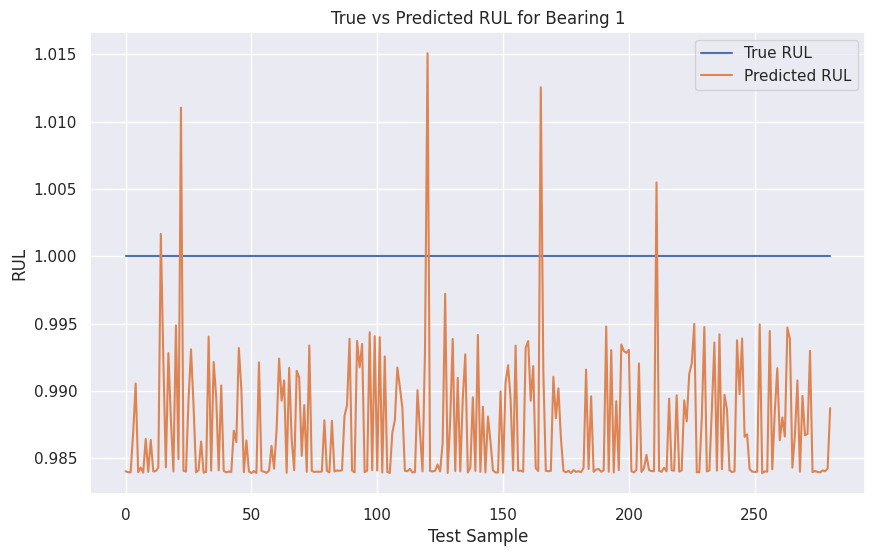

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
data='/content/merged_data_normalized_labeled_3_v1.xlsx'

# Step 1: Calculate the 'cycle' for Bearing 1
merged_data_normalized['cycle'] = merged_data_normalized.groupby('Bearing 1').cumcount() + 1

# Step 2: Calculate True RUL for Bearing 1
max_cycle_bearing_1 = merged_data_normalized[merged_data_normalized['Bearing 1'].notnull()]['cycle'].max()
merged_data_normalized['RUL'] = max_cycle_bearing_1 - merged_data_normalized['cycle']

# Step 3: Extract data for Bearing 1 and necessary columns
bearing_1_data = merged_data_normalized[['Bearing 1', 'cycle', 'RUL']]

# Step 4: Normalize features for LSTM
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(bearing_1_data[['Bearing 1']])  # Normalize just the feature columns

# Combine scaled features with RUL
bearing_1_data_scaled = pd.DataFrame(features_scaled, columns=['Bearing 1'])
bearing_1_data_scaled['RUL'] = bearing_1_data['RUL'].values

# Step 5: Create sequences for LSTM model
def create_sequences(data, sequence_length=50):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length + 1):
        seq = data.iloc[i:i + sequence_length, :-1].values  # Features (all columns except RUL)
        target = data.iloc[i + sequence_length - 1, -1]  # RUL value
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Create sequences for Bearing 1 data
sequence_length = 50  # Number of time steps per sequence
X, y = create_sequences(bearing_1_data_scaled, sequence_length=sequence_length)

# Step 6: Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 7: Build LSTM Model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(sequence_length, X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Regression output (RUL)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Step 8: Train the model
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

# Step 9: Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Step 10: Predictions
y_pred = model.predict(X_test)

# Step 11: Visualize Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.title('True vs Predicted RUL for Bearing 1')
plt.xlabel('Test Sample')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.0


   Cycle  True RUL  Predicted RUL
0      1         1       0.992349
1      2         1       0.992361
2      3         1       0.992281
3      4         1       0.992405
4      5         1       0.989191


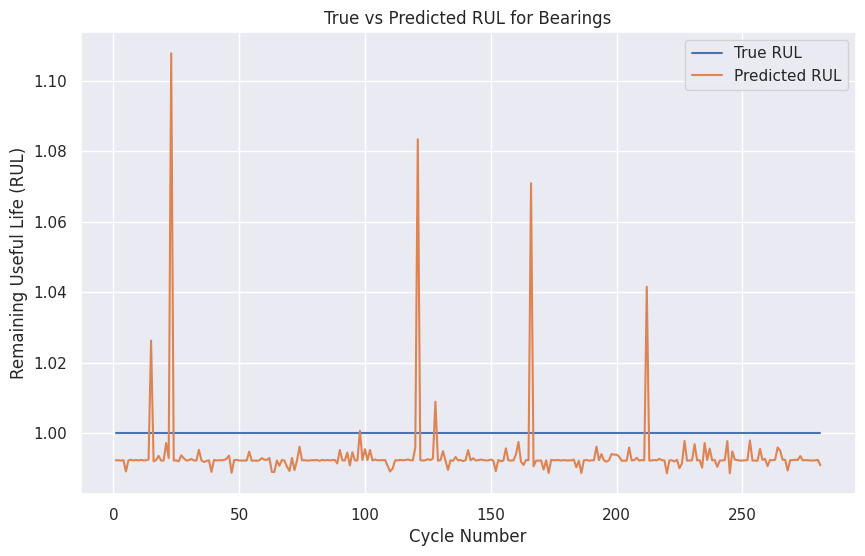

   Cycle  True RUL  Predicted RUL  Remaining Cycles
0      1         1       0.992349          0.992349
1      2         1       0.992361          0.992361
2      3         1       0.992281          0.992281
3      4         1       0.992405          0.992405
4      5         1       0.989191          0.989191


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test contains the true RUL for the test set and y_pred contains predicted RULs
# and you want to associate these with the cycle number for each sample

# Create a DataFrame with cycle numbers, true RUL, and predicted RUL
results = pd.DataFrame({
    'Cycle': range(1, len(y_test) + 1),  # Assign cycle numbers (assuming data is ordered by cycle)
    'True RUL': y_test,
    'Predicted RUL': y_pred.flatten()
})

# Print the first few rows of results to check
print(results.head())

# Visualize the true vs predicted RUL
plt.figure(figsize=(10, 6))
plt.plot(results['Cycle'], results['True RUL'], label='True RUL')
plt.plot(results['Cycle'], results['Predicted RUL'], label='Predicted RUL')
plt.title('True vs Predicted RUL for Bearings')
plt.xlabel('Cycle Number')
plt.ylabel('Remaining Useful Life (RUL)')
plt.legend()
plt.show()

# To calculate the number of cycles left for each bearing at each timestep:
def remaining_cycles_at_time_step(cycle_number, predicted_rul):
    return predicted_rul

# Apply the function to each row to get remaining cycles at each timestep
results['Remaining Cycles'] = results.apply(lambda row: remaining_cycles_at_time_step(row['Cycle'], row['Predicted RUL']), axis=1)

# Print updated results with remaining cycles
print(results.head())


RUL using Random Forest. As R2 Score is 0.9

Validation R²: 0.959130764106168
Validation RMSE: 59.212435416650564
Validation MAE: 36.90746376811594
Test R²: 0.9398758835300689
Test RMSE: 67.02507356317223
Test MAE: 42.67503378378378


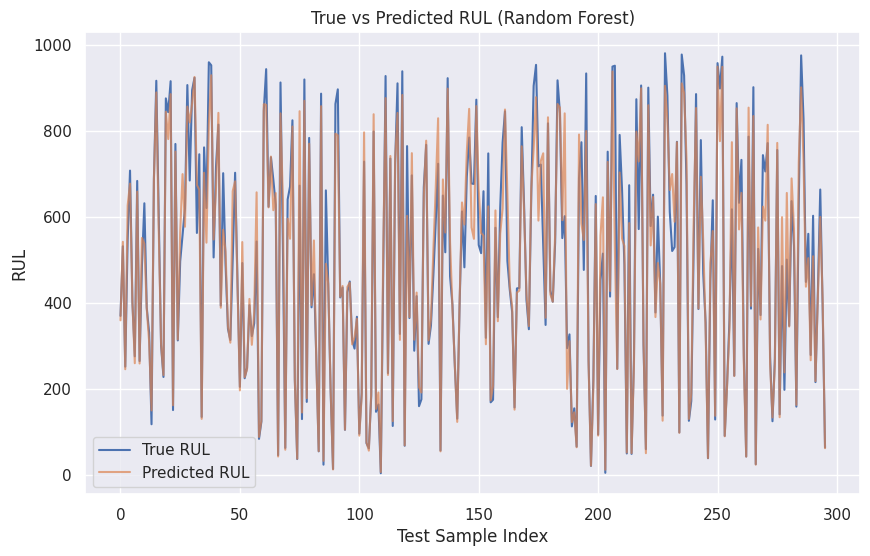

                Cycle  True RUL  Predicted RUL
0 2004-02-16 16:42:39       370         359.77
1 2004-02-15 13:42:39       532         542.37
2 2004-02-17 12:22:39       252         245.96
3 2004-02-15 11:12:39       547         626.74
4 2004-02-14 08:22:39       708         677.75
5 2004-02-16 11:32:39       401         402.52
6 2004-02-17 08:22:39       276         259.91
7 2004-02-14 12:22:39       684         659.19
8 2004-02-17 10:12:39       265         259.30
9 2004-02-15 20:52:39       489         551.42


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the dataset
# Assuming merged_data_normalized is your dataset and contains the RUL column
merged_data_normalized['cycle'] = range(1, len(merged_data_normalized) + 1)

# Calculate True RUL
max_cycle = merged_data_normalized['cycle'].max()
merged_data_normalized['RUL'] = max_cycle - merged_data_normalized['cycle']

# Define features and target
X = merged_data_normalized.drop(columns=['RUL', 'cycle'])  # Drop RUL and cycle columns
y = merged_data_normalized['RUL']  # Target is the RUL

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = rf.predict(X_val)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"Validation R²: {val_r2}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")

# Evaluate the model on the test set
y_test_pred = rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test R²: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")

# Visualize Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True RUL')
plt.plot(y_test_pred, label='Predicted RUL', alpha=0.7)
plt.title('True vs Predicted RUL (Random Forest)')
plt.xlabel('Test Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()


# Display cycles, true RUL, and predicted RUL
test_data_with_cycles = pd.DataFrame({
    'Cycle': X_test.index,  # Assuming the original index corresponds to the cycle number
    'True RUL': y_test.values,
    'Predicted RUL': y_test_pred
})

print(test_data_with_cycles.head(10))  # Display first 10 rows for brevity

RUL using Random Forest for Bearing 1

Mean Squared Error (MSE): 0.9828
R^2 Score: 1.0000
Random Forest RUL Prediction for Bearing 1:
                     cycle  True RUL  Predicted RUL  Cycles Remaining
2004-02-16 16:42:39    614       370         371.24               370
2004-02-15 13:42:39    452       532         530.00               532
2004-02-17 12:22:39    732       252         250.04               252
2004-02-15 11:12:39    437       547         548.06               547
2004-02-14 08:22:39    276       708         708.52               708
2004-02-16 11:32:39    583       401         401.16               401
2004-02-17 08:22:39    708       276         275.72               276
2004-02-14 12:22:39    300       684         683.06               684
2004-02-17 10:12:39    719       265         264.28               265
2004-02-15 20:52:39    495       489         489.60               489
2004-02-14 21:02:39    352       632         632.14               632
2004-02-16 13:32:39    595       389         387.66              

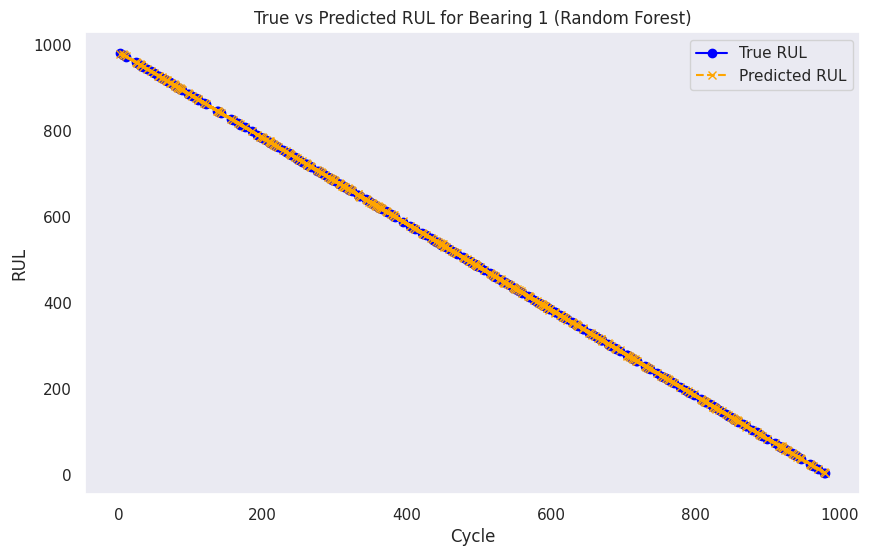

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load normalized data
# Assuming `normalized_data` is your DataFrame with bearings as columns
merged_data_normalized['cycle'] = range(1, len(merged_data_normalized) + 1)  # Adding a cycle column
max_cycle = merged_data_normalized['cycle'].max()

# Calculate True RUL for each cycle
merged_data_normalized['RUL'] = max_cycle - merged_data_normalized['cycle']

# Select data for Bearing 1
bearing_1_data = merged_data_normalized[['Bearing 1', 'cycle', 'RUL']]  # Columns for Bearing 1

# Features and Labels
X = bearing_1_data[['Bearing 1', 'cycle']]  # Features
y = bearing_1_data['RUL']  # Label

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on Test Set
y_test_pred = rf_model.predict(X_test)

# Performance Metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Combine Test Data for Analysis
X_test['True RUL'] = y_test.values
X_test['Predicted RUL'] = y_test_pred
X_test['Cycles Remaining'] = max_cycle - X_test['cycle']

# Display Results
print("Random Forest RUL Prediction for Bearing 1:")
print(X_test[['cycle', 'True RUL', 'Predicted RUL', 'Cycles Remaining']].head(20))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(X_test['cycle'], X_test['True RUL'], label='True RUL', color='blue', marker='o')
plt.plot(X_test['cycle'], X_test['Predicted RUL'], label='Predicted RUL', color='orange', linestyle='--', marker='x')
plt.title('True vs Predicted RUL for Bearing 1 (Random Forest)')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.legend()
plt.grid()
plt.show()


In [ ]:
data='/content/merged_data_normalized_labeled_3_v1.xlsx'

Code for Hybrid model CNN-LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 8, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,033 (300.91 KB)

 Trainable params: 77,033 (300.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - loss: 310856.5000 - mae: 485.2659 - val_loss: 351046.9688 - val_mae: 521.5725
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 293173.8438 - mae: 465.2084 - val_loss: 350955.1875 - val_mae: 521.4673
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 313474.3125 - mae: 481.9159 - val_loss: 350826.1562 - val_mae: 521.3189
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 317797.1250 - mae: 487.1563 - val_loss: 350626.5000 - val_mae: 521.0840
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 292343.7500 - mae: 464.1015 - val_loss: 350302.0938 - val_mae: 520.6923
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 288346.6250 - mae: 454.5157 - val_loss: 349754.0625 - val_mae: 520.0215
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 298300.5938 - mae: 468.3085 - val_loss: 348810.5312 - val_mae: 519.0681
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 290284.7500 - mae: 458.1709 - val_loss:

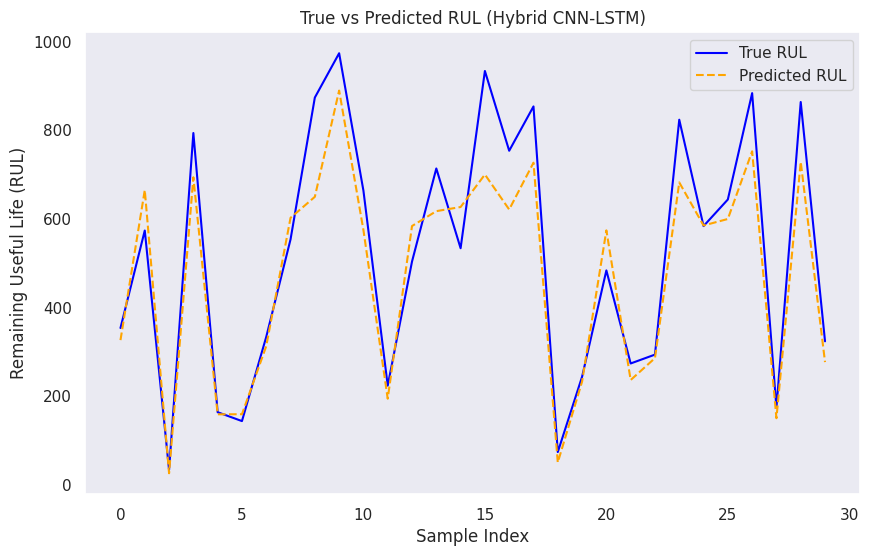

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, TimeDistributed, Input, Dropout
from tensorflow.keras.optimizers import Adam
data=pd.read_excel('/content/merged_data_normalized_labeled_3_v1.xlsx')
data['Cycle'] = range(1, len(data) + 1) #adding cycle column
max_cycle = data['Cycle'].max()
data['RUL'] = max_cycle - data['Cycle']

# Assume `data` is the normalized data containing features and `rul` as target variable
# Split features (X) and target (y)
X = data[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']]  # Replace with your actual feature columns
y = data['RUL']
time_steps = 10  # Example: use sequences of 30 cycles
num_sequences = len(X) // time_steps  # Calculate the number of sequences
X = X[:num_sequences * time_steps]
y = y[:num_sequences * time_steps]
num_features = X.shape[1]
X_seq = X.values.reshape(-1, time_steps, num_features)
y_seq = y.values[time_steps - 1::time_steps]  # Corresponding RUL values


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)

# Define the hybrid CNN-LSTM model
def build_hybrid_model(input_shape):
    model = Sequential()

    # CNN Layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # LSTM Layer
    model.add(LSTM(100, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))

    # Fully Connected Layers
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))  # Output layer for RUL prediction

    return model

# Model configuration
input_shape = (X_train.shape[1], X_train.shape[2])  # Time steps and features
model = build_hybrid_model(input_shape)
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Predictions
y_pred = model.predict(X_test)

# Plot True vs Predicted RUL
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True RUL", color="blue")
plt.plot(y_pred, label="Predicted RUL", color="orange", linestyle="--")
plt.title("True vs Predicted RUL (Hybrid CNN-LSTM)")
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")


R^2 Score: 0.8855
